<a href="https://colab.research.google.com/github/lstredel/hallenge-Telecom-X-Parte2/blob/main/Challenge_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configura opciones de Pandas
pd.set_option('future.no_silent_downcasting', True)

In [130]:
# Descarga el dataset desde el repositorio original
df=pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json')

In [131]:
# Aplana las estructuras anidadas del JSON para convertir cada clave en una columna independiente
df = pd.json_normalize(df.to_dict('records'))


In [132]:
# Muestra un resumen técnico del DataFrame, incluyendo tipos de datos y valores no nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [133]:
# Muestra las primeras cinco filas del DataFrame para verificar la estructura de los datos
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [134]:
# Reemplaza los valores categóricos 'Yes' y 'No' por sus equivalentes numéricos 1 y 0 en todo el DataFrame
df = df.replace({'Yes': 1, 'No': 0})

In [135]:
# Muestra los valores únicos presentes en la columna 'Churn' para identificar datos inconsistentes o nulos
print(df['Churn'].unique())

[0 1 '']


In [136]:
# Contabiliza la frecuencia de cada valor en la columna 'Churn' para conocer la distribución de la deserción
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
      224
Name: count, dtype: int64


In [137]:
# Sustituye los valores vacíos en la columna 'Churn' por la categoría 'No'
df['Churn'] = df['Churn'].replace("", 0)

In [138]:
# Muestra los valores únicos de 'Churn' para confirmar que los vacíos se convirtieron en 'No'
print(df['Churn'].unique())

[0 1]


In [139]:
# Convierte los valores de la columna 'Churn' al formato numérico más adecuado, transformando errores en valores nulos (NaN)
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

In [140]:
# Establece el tipo de dato de la columna 'Churn' como entero de 64 bits para optimizar el análisis estadístico
df['Churn'] = df['Churn'].astype('int64')

In [141]:
# Muestra los valores únicos de la columna 'customer.Partner' para verificar su contenido
print(df['customer.Partner'].unique())

[1 0]


In [142]:
# Define el tipo de dato de la columna 'customer.Partner' como entero de 64 bits para asegurar la consistencia numérica
df['customer.Partner'] = df['customer.Partner'].astype('int64')

In [143]:
# Muestra los valores únicos de 'customer.Dependents' para identificar el formato de los datos y posibles nulos
print(df['customer.Dependents'].unique())

[1 0]


In [144]:
# Convierte la columna 'customer.Dependents' a tipo entero de 64 bits para estandarizar las variables categóricas
df['customer.Dependents'] = df['customer.Dependents'].astype('int64')

In [145]:
# Muestra los valores únicos de 'phone.MultipleLines' para identificar las categorías de servicio telefónico
print(df['phone.MultipleLines'].unique())

[0 1 'No phone service']


In [146]:
# Contabiliza la frecuencia de cada categoría en 'phone.MultipleLines' para analizar la adopción del servicio
print(df['phone.MultipleLines'].value_counts())

phone.MultipleLines
0                   3495
1                   3065
No phone service     707
Name: count, dtype: int64


In [147]:
# Filtra las filas donde existe una contradicción: el cliente tiene servicio telefónico pero indica 'No phone service' en líneas múltiples
error_logico = df[(df['phone.PhoneService'] == 1) &
                  (df['phone.MultipleLines'] == 'No phone service')]

In [148]:
# Informa la cantidad de registros donde la relación entre servicio telefónico y líneas múltiples es inconsistente
print(f"Se encontraron {len(error_logico)} filas con inconsistencia lógica.")

Se encontraron 0 filas con inconsistencia lógica.


In [149]:
# Unifica las categorías negativas reemplazando 'No phone service' por 0 para estandarizar la columna
df['phone.MultipleLines'] = df['phone.MultipleLines'].replace("No phone service", 0)

In [150]:
# Convierte los valores de 'phone.MultipleLines' a formato numérico, gestionando cualquier residuo de texto como valor nulo
df['phone.MultipleLines'] = pd.to_numeric(df['phone.MultipleLines'], errors='coerce')

In [151]:
# Finaliza la transformación de 'phone.MultipleLines' convirtiéndola a tipo entero para su uso en modelos
df['phone.MultipleLines'] = df['phone.MultipleLines'].astype('int64')

In [152]:
# Verifica la distribución final de los valores en 'phone.MultipleLines' para confirmar la conversión a formato binario (0 y 1)
print(df['phone.MultipleLines'].value_counts())

phone.MultipleLines
0    4202
1    3065
Name: count, dtype: int64


In [153]:
# Muestra los valores únicos de 'internet.OnlineSecurity' para evaluar la estructura de categorías de seguridad
print(df['internet.OnlineSecurity'].unique())

[0 1 'No internet service']


In [154]:
# Muestra las categorías de servicio de internet para identificar las tecnologías disponibles (DSL, Fiber optic, No)
print(df['internet.InternetService'].unique())

['DSL' 'Fiber optic' 0]


In [155]:
# Contabiliza la cantidad de clientes por cada tipo de tecnología de internet para analizar la penetración del servicio
print(df["internet.InternetService"].value_counts())

internet.InternetService
Fiber optic    3198
DSL            2488
0              1581
Name: count, dtype: int64


In [156]:
# Filtra las filas donde el cliente tiene contratado internet pero su seguridad en línea marca contradictoriamente 'No internet service'
error_logico = df[(df['internet.InternetService'] != 0) &
                  (df['internet.OnlineSecurity'] == 'No internet service')]

In [157]:
# Informa la cantidad de registros donde un cliente con internet activo tiene una etiqueta contradictoria en seguridad
print(f"Se encontraron {len(error_logico)} filas con inconsistencia lógica.")

Se encontraron 0 filas con inconsistencia lógica.


In [158]:
# Unifica las categorías negativas de seguridad reemplazando 'No internet service' por 0 para estandarizar la columna
df['internet.OnlineSecurity'] = df['internet.OnlineSecurity'].replace("No internet service", 0)

In [159]:
# Convierte los valores de 'internet.OnlineSecurity' a formato numérico, gestionando cualquier residuo de texto como valor nulo
df['internet.OnlineSecurity'] = pd.to_numeric(df['internet.OnlineSecurity'], errors='coerce')

In [160]:
# Convierte 'internet.OnlineSecurity' a tipo entero de 64 bits para finalizar su transformación a variable binaria
df['internet.OnlineSecurity'] = df['internet.OnlineSecurity'].astype('int64')

In [161]:
# Verifica la distribución final de los valores en 'internet.OnlineSecurity' para confirmar la conversión exitosa a formato binario
print(df['internet.OnlineSecurity'] .value_counts())

internet.OnlineSecurity
0    5189
1    2078
Name: count, dtype: int64


In [162]:
# Muestra los valores únicos de 'internet.OnlineBackup' para identificar las categorías del servicio de respaldo en la nube
print(df['internet.OnlineBackup'].unique())

[1 0 'No internet service']


In [163]:
# Filtra las filas donde el cliente tiene internet pero el respaldo marca 'No internet service' para detectar inconsistencias

error_logico = df[(df['internet.InternetService'] != 0) &
                  (df['internet.OnlineBackup'] == 'No internet service')]

In [164]:
# Reporta la cantidad de inconsistencias encontradas entre el servicio de internet y el respaldo en línea
print(f"Se encontraron {len(error_logico)} filas con inconsistencia lógica.")

Se encontraron 0 filas con inconsistencia lógica.


In [165]:
# Reemplaza 'No internet service' por 0 en 'internet.OnlineBackup' para simplificar la variable a un esquema binario
df['internet.OnlineBackup'] = df['internet.OnlineBackup'].replace("No internet service", 0)

In [166]:
# Convierte los valores de 'internet.OnlineBackup' a formato numérico, gestionando cualquier residuo de texto como valor nulo
df['internet.OnlineBackup'] = pd.to_numeric(df['internet.OnlineBackup'], errors='coerce')

In [167]:
# Finaliza la transformación de 'internet.OnlineBackup' convirtiéndola a tipo entero de 64 bits
df['internet.OnlineBackup'] = df['internet.OnlineBackup'].astype('int64')

In [168]:
# Muestra la distribución final de 'internet.OnlineBackup' tras la limpieza para confirmar la estructura binaria de la variable
print(df['internet.OnlineBackup'] .value_counts())

internet.OnlineBackup
0    4763
1    2504
Name: count, dtype: int64


In [169]:
# Muestra los valores únicos de 'internet.DeviceProtection' para verificar si requiere el mismo tratamiento de limpieza
print(df['internet.DeviceProtection'].unique())

[0 1 'No internet service']


In [170]:
# Filtra las filas donde el cliente tiene internet pero la protección de dispositivo marca 'No internet service'
error_logico = df[(df['internet.InternetService'] != 0) &
                  (df['internet.DeviceProtection'] == 'No internet service')]

In [171]:
# Reporta el número de discrepancias entre el servicio base de internet y la etiqueta de protección de dispositivos
print(f"Se encontraron {len(error_logico)} filas con inconsistencia lógica.")

Se encontraron 0 filas con inconsistencia lógica.


In [172]:
# Unifica las categorías negativas en 'internet.DeviceProtection' reemplazando 'No internet service' por 0
df['internet.DeviceProtection'] = df['internet.DeviceProtection'].replace("No internet service", 0)

In [173]:
# Convierte los valores de 'internet.DeviceProtection' a formato numérico, gestionando cualquier residuo de texto como valor nulo
df['internet.DeviceProtection'] = pd.to_numeric(df['internet.DeviceProtection'], errors='coerce')

In [174]:
# Finaliza la estandarización de 'internet.DeviceProtection' convirtiéndola a tipo entero de 64 bits
df['internet.DeviceProtection'] = df['internet.DeviceProtection'].astype('int64')

In [175]:
# Verifica la distribución final de los valores en 'internet.DeviceProtection' para confirmar la conversión a formato binario
print(df['internet.DeviceProtection'].value_counts())


internet.DeviceProtection
0    4776
1    2491
Name: count, dtype: int64


In [176]:
# Muestra los valores únicos de 'internet.TechSupport' para identificar las categorías del servicio de soporte técnico
print(df['internet.TechSupport'].unique())

[1 0 'No internet service']


In [177]:
# Filtra las filas donde el cliente tiene internet pero el soporte técnico marca 'No internet service' para detectar inconsistencias
error_logico = df[(df['internet.InternetService'] != 0) &
                  (df['internet.TechSupport'] == 'No internet service')]

In [178]:
# Reporta el número de discrepancias entre el servicio base de internet y la etiqueta de soporte técnico
print(f"Se encontraron {len(error_logico)} filas con inconsistencia lógica.")

Se encontraron 0 filas con inconsistencia lógica.


In [179]:
# Reemplaza 'No internet service' por 0, consolidando la ausencia del servicio bajo un mismo valor numérico
df['internet.TechSupport'] = df['internet.TechSupport'].replace("No internet service", 0)

In [180]:
# Convierte 'internet.TechSupport' a tipo numérico, transformando valores no reconocidos en NaN (aunque ya los limpiamos)
df['internet.TechSupport'] = pd.to_numeric(df['internet.TechSupport'], errors='coerce')

In [181]:
# Finaliza la preparación de 'internet.TechSupport' convirtiéndola a tipo entero para su uso en modelos estadísticos
df['internet.TechSupport'] = df['internet.TechSupport'].astype('int64')

In [182]:
# Muestra la distribución final de 'internet.TechSupport' para confirmar que ahora es una variable binaria (0 y 1)
print(df['internet.TechSupport'] .value_counts())

internet.TechSupport
0    5163
1    2104
Name: count, dtype: int64


In [183]:
# Explora los valores únicos de 'internet.StreamingTV' para confirmar si sigue el patrón de las variables anteriores
print(df['internet.StreamingTV'].unique())

[1 0 'No internet service']


In [184]:
# Verifica si existen clientes con servicio de internet activo que tengan la etiqueta 'No internet service' en StreamingTV
error_logico = df[(df['internet.InternetService'] != 0) &
                  (df['internet.StreamingTV'] == 'No internet service')]

In [185]:
# Reporta el número de discrepancias entre el servicio base de internet y la etiqueta de televisión por streaming
print(f"Se encontraron {len(error_logico)} filas con inconsistencia lógica.")

Se encontraron 0 filas con inconsistencia lógica.


In [186]:
# Unifica la ausencia del servicio de StreamingTV bajo el valor 0, eliminando la redundancia de 'No internet service'
df['internet.StreamingTV'] = df['internet.StreamingTV'].replace("No internet service", 0)

In [187]:
# Convierte los valores de 'internet.StreamingTV' a formato numérico, gestionando cualquier residuo de texto como NaN
df['internet.StreamingTV'] = pd.to_numeric(df['internet.StreamingTV'], errors='coerce')

In [188]:
# Finaliza la preparación de 'internet.StreamingTV' convirtiéndola a tipo entero de 64 bits
df['internet.StreamingTV'] = df['internet.StreamingTV'].astype('int64')

In [189]:
# Muestra la distribución final de 'internet.StreamingTV' para confirmar la conversión exitosa a formato binario
print(df['internet.StreamingTV'] .value_counts())

internet.StreamingTV
0    4477
1    2790
Name: count, dtype: int64


In [190]:
# Explora los valores únicos de la última columna de servicios de internet: StreamingMovies
print(df['internet.StreamingMovies'].unique())

[0 1 'No internet service']


In [191]:
# Validación final: Verifica consistencia entre el servicio de internet y la etiqueta de películas por streaming
error_logico = df[(df['internet.InternetService'] != 0) &
                  (df['internet.StreamingMovies'] == 'No internet service')]
print(f"Se encontraron {len(error_logico)} filas con inconsistencia lógica.")

Se encontraron 0 filas con inconsistencia lógica.


In [192]:
# Procesa íntegramente la columna StreamingMovies: unifica categorías, convierte a numérico y asegura tipo entero
df['internet.StreamingMovies'] = df['internet.StreamingMovies'].replace("No internet service", 0)
df['internet.StreamingMovies'] = pd.to_numeric(df['internet.StreamingMovies'], errors='coerce')
df['internet.StreamingMovies'] = df['internet.StreamingMovies'].astype('int64')
print(df['internet.StreamingMovies'] .value_counts())

internet.StreamingMovies
0    4451
1    2816
Name: count, dtype: int64


In [193]:
# Inspección general del DataFrame para verificar tipos de datos y memoria tras la limpieza del bloque de internet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   int64  
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   int64  
 11  internet.OnlineBackup      7267 non-null   int64  
 12  internet.DeviceProtection  7267 non-null   int64  
 13  internet.TechSupport       7267 non-null   int64

In [194]:
# Explora los valores únicos de la columna de facturación electrónica
print(df['account.PaperlessBilling'].unique())

[1 0]


In [195]:
# Mapea 'Yes' a 1 y 'No' a 0 en la facturación sin papel, optimizando la inferencia de tipos de datos
df['account.PaperlessBilling'] = df['account.PaperlessBilling'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)

In [196]:
# Asegura que no existan valores nulos y establece el tipo de dato final como entero para PaperlessBilling
df['account.PaperlessBilling'] = df['account.PaperlessBilling'].fillna(0).astype('int64')

In [197]:
# Detecta registros donde 'TotalCharges' tiene un espacio en blanco en lugar de un número
solo_espacios = df[df['account.Charges.Total'] == " "]

In [198]:
# Reporta el volumen de datos "fantasma" y visualiza su contexto
print(f"Cantidad de filas con espacio en blanco: {len(solo_espacios)}")
display(solo_espacios[['customerID', 'customer.tenure', 'account.Charges.Total']])

Cantidad de filas con espacio en blanco: 11


,customerID,customer.tenure,account.Charges.Total
975,1371-DWPAZ,0,
1775,2520-SGTTA,0,
1955,2775-SEFEE,0,
2075,2923-ARZLG,0,
2232,3115-CZMZD,0,
2308,3213-VVOLG,0,
2930,4075-WKNIU,0,
3134,4367-NUYAO,0,
3203,4472-LVYGI,0,
4169,5709-LVOEQ,0,


In [199]:
# Normaliza los cargos totales: maneja vacíos, convierte a tipo flotante y asegura consistencia para clientes nuevos
df['account.Charges.Total'] = df['account.Charges.Total'].replace("", 0)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)
df['account.Charges.Total'] = df['account.Charges.Total'].astype('float64')
print(df['account.Charges.Total'] .value_counts())

account.Charges.Total
20.20      11
0.00       11
19.75       9
19.55       9
19.90       9
           ..
1993.20     1
72.10       1
1237.85     1
542.40      1
593.30      1
Name: count, Length: 6531, dtype: int64


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   int64  
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   int64  
 11  internet.OnlineBackup      7267 non-null   int64  
 12  internet.DeviceProtection  7267 non-null   int64  
 13  internet.TechSupport       7267 non-null   int64

In [201]:
 df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   int64  
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   int64  
 11  internet.OnlineBackup      7267 non-null   int64  
 12  internet.DeviceProtection  7267 non-null   int64  
 13  internet.TechSupport       7267 non-null   int64

In [203]:
# Define el diccionario para traducir las columnas al español
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Desercion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses_Permanencia',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Lineas_Multiples',
    'internet.InternetService': 'Tipo_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Factura_Digital',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargos_Mensuales',
    'account.Charges.Total': 'Cargos_Totales'
}

# Renombra las columnas y reordena para que Desercion sea la segunda columna
df = df.rename(columns=mapeo_columnas)

# Define la lista de las 21 columnas finales deseadas (ahora en español)
columnas_finales_deseadas = [
    'ID_Cliente', 'Desercion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
    'Dependientes', 'Meses_Permanencia', 'Servicio_Telefonico', 'Lineas_Multiples',
    'Tipo_Internet', 'Seguridad_Online', 'Respaldo_Online',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
    'Streaming_Peliculas', 'Tipo_Contrato', 'Factura_Digital',
    'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales'
]

# Filtra el DataFrame 'df' para mantener solo estas columnas y en este orden
df = df[columnas_finales_deseadas]

# Verificacion final del orden y la cantidad de columnas
print("Primeras columnas confirmadas:")
print(df.columns[:5].tolist())

Primeras columnas confirmadas:
['ID_Cliente', 'Desercion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja']


In [204]:
# Muestra la distribución final de 'Servicio_Telefonico' para confirmar la conversión exitosa a formato binario
print(df['Servicio_Telefonico'] .value_counts())

Servicio_Telefonico
1    6560
0     707
Name: count, dtype: int64


In [205]:
# Finaliza la conversión de 'Servicio_Telefonico' a tipo entero, optimizando la columna para cálculos estadísticos
df['Servicio_Telefonico'] = df['Servicio_Telefonico'].astype('int64')

In [206]:
# Muestra la distribución final de 'Tipo_Internet' para confirmar la conversión exitosa a formato binario
print(df['Tipo_Internet'] .value_counts())

Tipo_Internet
Fiber optic    3198
DSL            2488
0              1581
Name: count, dtype: int64


In [207]:
# Creamos un mapeo jerárquico para la nueva columna
mapeo_internet = {
    '0': 0,
    'DSL': 1,
    'Fiber optic': 2
}

# Creamos la nueva columna numérica basada en la original
df['Tipo_Internet_Codigo'] = df['Tipo_Internet'].astype(str).map(mapeo_internet)

# Verificamos que ambas columnas coexistan correctamente
display(df[['Tipo_Internet', 'Tipo_Internet_Codigo']].drop_duplicates())

,Tipo_Internet,Tipo_Internet_Codigo
0,DSL,1
2,Fiber optic,2
20,0,0


In [208]:
# Definimos el mapeo para género (estándar binario)
mapeo_genero = {
    'Female': 0,
    'Male': 1
}

# Creamos la columna numérica al lado de la original
df['Genero_Codigo'] = df['Genero'].map(mapeo_genero)

# Verificamos la creación exitosa
display(df[['Genero', 'Genero_Codigo']].drop_duplicates())

,Genero,Genero_Codigo
0,Female,0
1,Male,1


In [209]:
 df.head()

,ID_Cliente,Desercion,Genero,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Tipo_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Tipo_Internet_Codigo,Genero_Codigo
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,1,0
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1,1
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2,1
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,2,1
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2,0


In [210]:
# Definimos el mapeo jerárquico para los contratos
mapeo_contrato = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

# Creamos la columna numérica manteniendo la original para análisis visual
df['Tipo_Contrato_Codigo'] = df['Tipo_Contrato'].map(mapeo_contrato)

# Verificamos la coexistencia de ambas columnas
display(df[['Tipo_Contrato', 'Tipo_Contrato_Codigo']].drop_duplicates())

,Tipo_Contrato,Tipo_Contrato_Codigo
0,One year,1
1,Month-to-month,0
6,Two year,2


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Desercion               7267 non-null   int64  
 2   Genero                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Tiene_Pareja            7267 non-null   int64  
 5   Dependientes            7267 non-null   int64  
 6   Meses_Permanencia       7267 non-null   int64  
 7   Servicio_Telefonico     7267 non-null   int64  
 8   Lineas_Multiples        7267 non-null   int64  
 9   Tipo_Internet           7267 non-null   object 
 10  Seguridad_Online        7267 non-null   int64  
 11  Respaldo_Online         7267 non-null   int64  
 12  Proteccion_Dispositivo  7267 non-null   int64  
 13  Soporte_Tecnico         7267 non-null   int64  
 14  Streaming_TV            7267 non-null   

In [212]:
 df.head()

,ID_Cliente,Desercion,Genero,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Tipo_Internet,...,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Tipo_Internet_Codigo,Genero_Codigo,Tipo_Contrato_Codigo
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,1,0,1
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1,1,0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2,1,0
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,2,1,0
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2,0,0


In [213]:
# Identificamos los valores únicos
print(df['Metodo_Pago'].unique())

['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [214]:
# Definimos el mapeo exacto para los métodos de pago
mapeo_pago = {
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
}

# Creamos la columna numérica al lado de la original
df['Metodo_Pago_Codigo'] = df['Metodo_Pago'].map(mapeo_pago)

# Verificamos que se haya aplicado correctamente
display(df[['Metodo_Pago', 'Metodo_Pago_Codigo']].drop_duplicates())

,Metodo_Pago,Metodo_Pago_Codigo
0,Mailed check,1
2,Electronic check,0
5,Credit card (automatic),3
6,Bank transfer (automatic),2


In [215]:
# Definimos el orden lógico: Columna Original seguida de su Código
nuevo_orden = [
    'ID_Cliente','Desercion',
    'Genero', 'Genero_Codigo',
    'Adulto_Mayor', 'Tiene_Pareja', 'Dependientes', 'Meses_Permanencia',
    'Servicio_Telefonico', 'Lineas_Multiples',
    'Tipo_Internet', 'Tipo_Internet_Codigo',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
    'Tipo_Contrato', 'Tipo_Contrato_Codigo',
    'Factura_Digital',
    'Metodo_Pago', 'Metodo_Pago_Codigo',
    'Cargos_Mensuales', 'Cargos_Totales',

]


# Reordenamos el DataFrame (asegúrate de incluir todas las columnas que tengas)
df = df[nuevo_orden]

# Visualizamos las primeras filas para confirmar el orden
display(df.head())

,ID_Cliente,Desercion,Genero,Genero_Codigo,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Tipo_Contrato_Codigo,Factura_Digital,Metodo_Pago,Metodo_Pago_Codigo,Cargos_Mensuales,Cargos_Totales
0,0002-ORFBO,0,Female,0,0,1,1,9,1,0,...,1,1,0,One year,1,1,Mailed check,1,65.6,593.30
1,0003-MKNFE,0,Male,1,0,0,0,9,1,1,...,0,0,1,Month-to-month,0,0,Mailed check,1,59.9,542.40
2,0004-TLHLJ,1,Male,1,0,0,0,4,1,0,...,0,0,0,Month-to-month,0,1,Electronic check,0,73.9,280.85
3,0011-IGKFF,1,Male,1,1,1,0,13,1,0,...,0,1,1,Month-to-month,0,1,Electronic check,0,98.0,1237.85
4,0013-EXCHZ,1,Female,0,1,1,0,3,1,0,...,1,1,0,Month-to-month,0,1,Mailed check,1,83.9,267.40


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Desercion               7267 non-null   int64  
 2   Genero                  7267 non-null   object 
 3   Genero_Codigo           7267 non-null   int64  
 4   Adulto_Mayor            7267 non-null   int64  
 5   Tiene_Pareja            7267 non-null   int64  
 6   Dependientes            7267 non-null   int64  
 7   Meses_Permanencia       7267 non-null   int64  
 8   Servicio_Telefonico     7267 non-null   int64  
 9   Lineas_Multiples        7267 non-null   int64  
 10  Tipo_Internet           7267 non-null   object 
 11  Tipo_Internet_Codigo    7267 non-null   int64  
 12  Seguridad_Online        7267 non-null   int64  
 13  Respaldo_Online         7267 non-null   int64  
 14  Proteccion_Dispositivo  7267 non-null   

In [217]:
import matplotlib.ticker as mtick

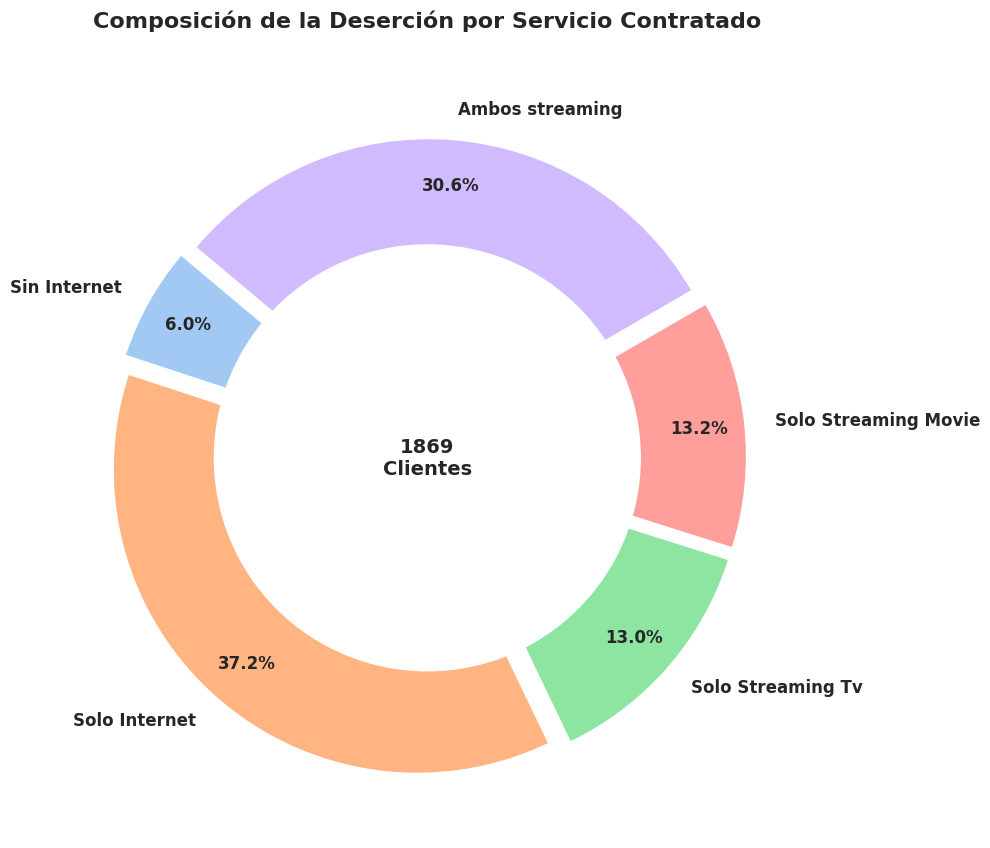

In [218]:
# --- 1. PREPARACIÓN DE DATOS ---
# Filtramos solo a los desertores (Desercion == 1)
df_desertores = df[df['Desercion'] == 1].copy()

# Re-aplicamos la función de clasificación (asegurándonos de que la columna existe)
def clasificar_perfil_final(row):
    internet = row['Tipo_Internet']
    if internet == 0 or str(internet).strip() == '0':
        return 'Sin Internet'

    tv = row['Streaming_TV']
    movie = row['Streaming_Peliculas']

    if tv == 0 and movie == 0:
        return 'Solo Internet'
    elif tv == 1 and movie == 0:
        return 'Solo Streaming Tv'
    elif tv == 0 and movie == 1:
        return 'Solo Streaming Movie'
    elif tv == 1 and movie == 1:
        return 'Ambos streaming'
    return 'Otros'

df_desertores['Perfil_Servicio'] = df_desertores.apply(clasificar_perfil_final, axis=1)

# Contamos cuántas personas hay en cada perfil
composicion_perfil = df_desertores['Perfil_Servicio'].value_counts()

# Ordenamos para que el gráfico sea consistente con los anteriores
orden_columnas = ['Sin Internet', 'Solo Internet', 'Solo Streaming Tv', 'Solo Streaming Movie', 'Ambos streaming']
composicion_perfil = composicion_perfil.reindex(orden_columnas).fillna(0)

# --- 2. CONFIGURACIÓN DEL GRÁFICO ---
plt.figure(figsize=(10, 10))
# Usamos una paleta de colores variada pero profesional
colores = sns.color_palette('pastel')[0:len(composicion_perfil)]

# --- 3. CREACIÓN DEL GRÁFICO DE TORTA ---
plt.pie(
    composicion_perfil,
    labels=composicion_perfil.index,
    autopct='%1.1f%%',       # Porcentaje de personas
    startangle=140,
    colors=colores,
    pctdistance=0.85,
    explode=[0.05] * len(composicion_perfil), # Separación elegante
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# --- 4. FORMATO DE DONA ---
centro_circulo = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# --- 5. TÍTULOS Y DETALLES ---
plt.title('Composición de la Deserción por Servicio Contratado\n',
          fontsize=16, fontweight='bold', pad=20)

# Añadimos el número total de personas en el centro
total_personas = composicion_perfil.sum()
plt.text(0, 0, f'{int(total_personas)}\nClientes', ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

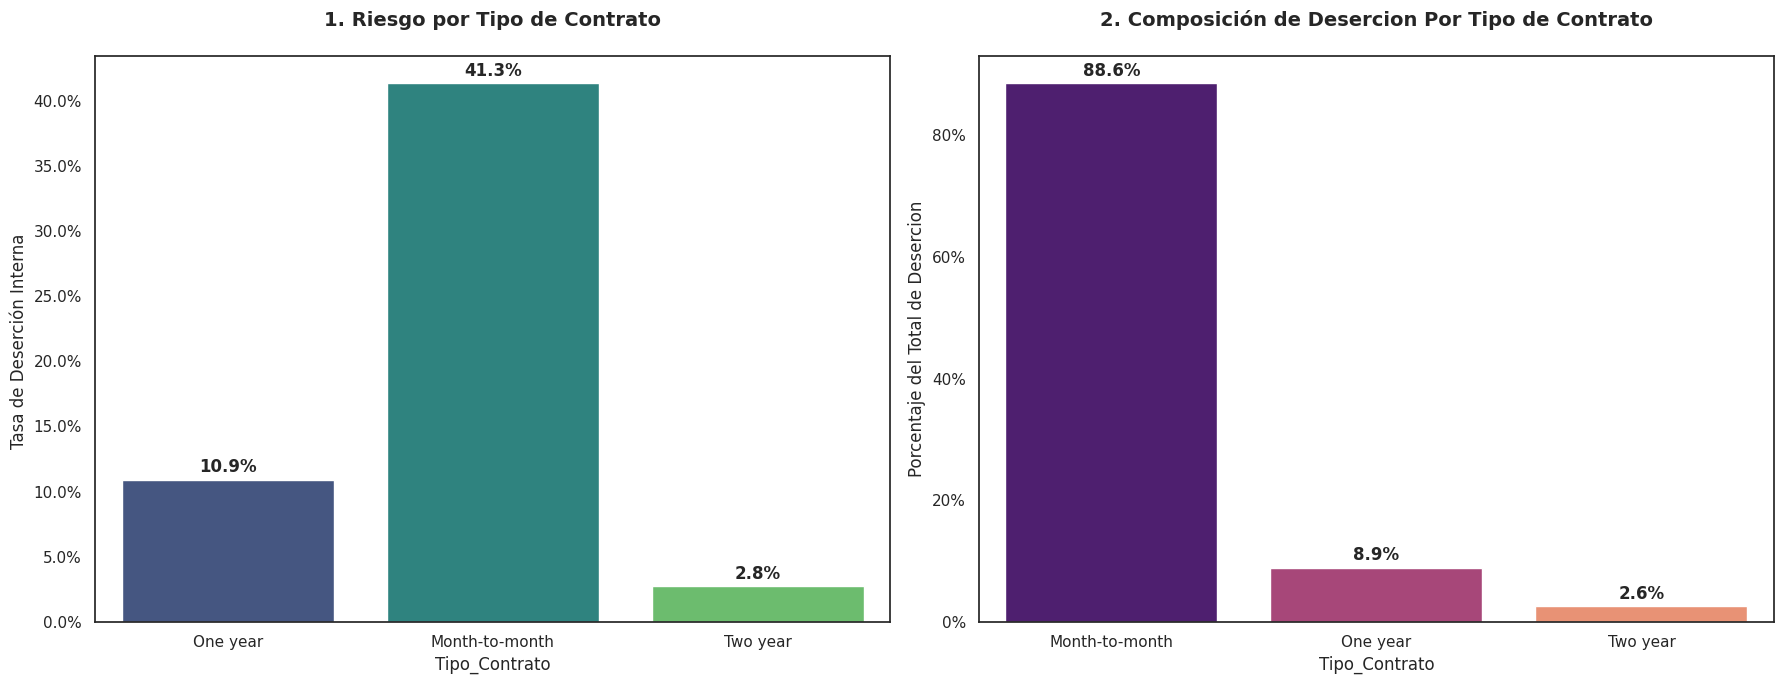

In [219]:
# Preparara datos para el segundo gráfico (Composición del Total)
df_solo_fuga = df[df['Desercion'] == 1]
composicion_fuga = df_solo_fuga['Tipo_Contrato'].value_counts(normalize=True) * 100

# Creacion de la estructura: 1 fila, 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
sns.set_theme(style="whitegrid")

# --- GRÁFICO 1: TASA DE DESERCIÓN INTERNA (RIESGO) ---
sns.barplot(x='Tipo_Contrato', y=df['Desercion'] * 100, data=df,
            palette='viridis', ax=ax1, errorbar=None, hue='Tipo_Contrato', legend=False)

ax1.set_title('1. Riesgo por Tipo de Contrato\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Tasa de Deserción Interna ')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

# --- GRÁFICO 2: COMPOSICIÓN DEL TOTAL (VOLUMEN) ---
sns.barplot(x=composicion_fuga.index, y=composicion_fuga.values,
            palette='magma', ax=ax2, hue=composicion_fuga.index, legend=False)

ax2.set_title('2. Composición de Desercion Por Tipo de Contrato\n', fontsize=14, fontweight='bold')
ax2.set_ylabel('Porcentaje del Total de Desercion')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

# Ajuste final para que no se amontonen los gráficos
plt.tight_layout()
plt.show()

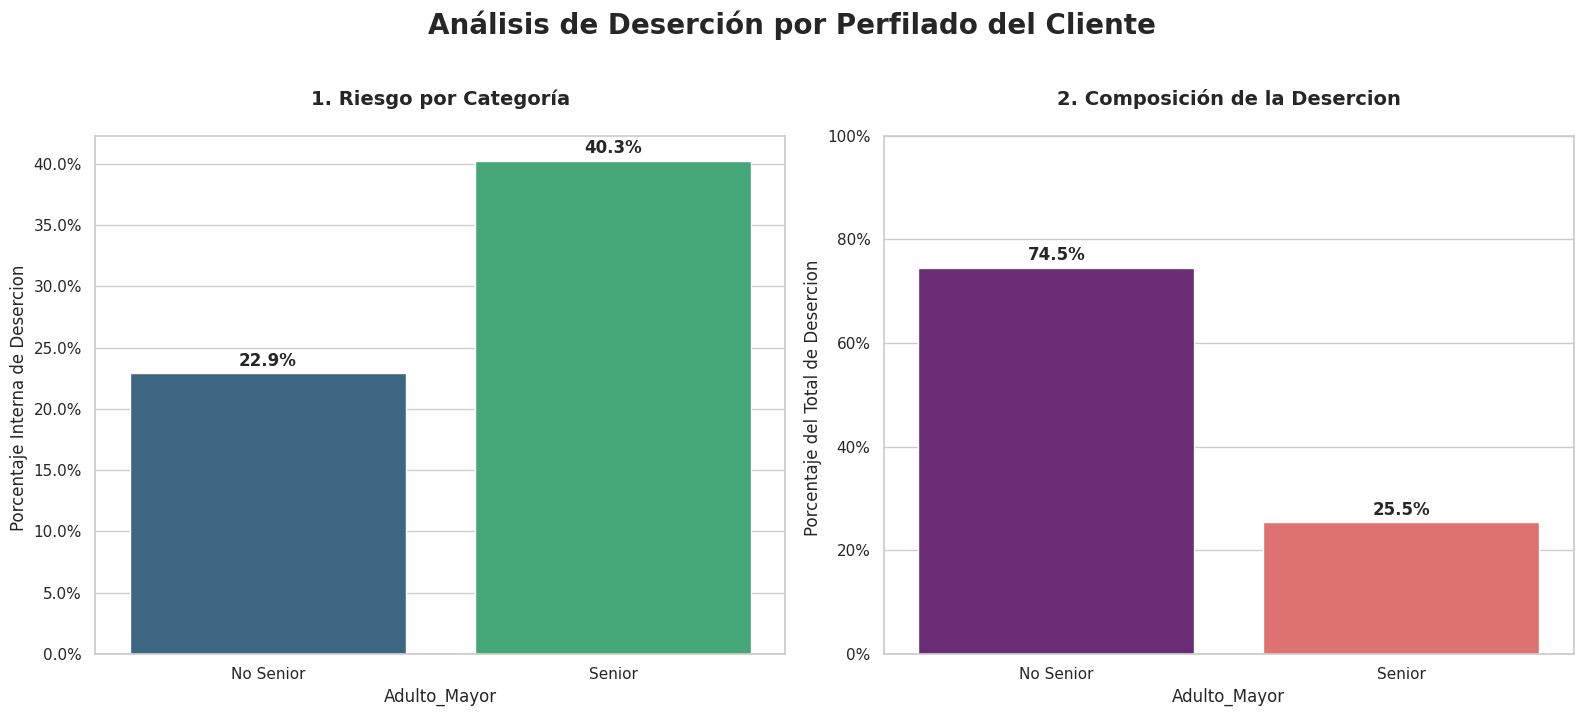

In [220]:
# Prepara los datos para el segundo gráfico (Composición del Total de fugas)
df_solo_fuga = df[df['Desercion'] == 1]
# Calcula la proporción sobre el total de los que se fueron
composicion_senior = df_solo_fuga['Adulto_Mayor'].value_counts(normalize=True) * 100

# Creacion de la estructura: 1 fila, 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
sns.set_theme(style="whitegrid")

plt.suptitle('Análisis de Deserción por Perfilado del Cliente', fontsize=20, fontweight='bold', y=1.02)

# --- GRÁFICO 1: TASA DE DESERCIÓN INTERNA (RIESGO) ---
# Responde: ¿Qué % de cada grupo se va?
sns.barplot(x='Adulto_Mayor', y=df['Desercion'] * 100, data=df,
            palette='viridis', ax=ax1, errorbar=None, hue='Adulto_Mayor', legend=False)

ax1.set_title('1. Riesgo por Categoría\n', fontsize=14, fontweight='bold')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['No Senior', 'Senior'])
ax1.set_ylabel('Porcentaje Interna de Desercion ')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# Etiquetas para el Gráfico 1
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

# --- GRÁFICO 2: COMPOSICIÓN DEL TOTAL (VOLUMEN) ---
# Responde: De todos los que se fueron, ¿cuántos eran Senior y cuántos No Senior?
sns.barplot(x=composicion_senior.index, y=composicion_senior.values,
            palette='magma', ax=ax2, hue=composicion_senior.index, legend=False)

ax2.set_title('2. Composición de la Desercion\n', fontsize=14, fontweight='bold')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['No Senior', 'Senior'])
ax2.set_ylabel('Porcentaje del Total de Desercion ')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylim(0, 100) # Este llega a 100 porque es una distribución total

# Etiquetas para el Gráfico 2
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

plt.tight_layout()
plt.show()

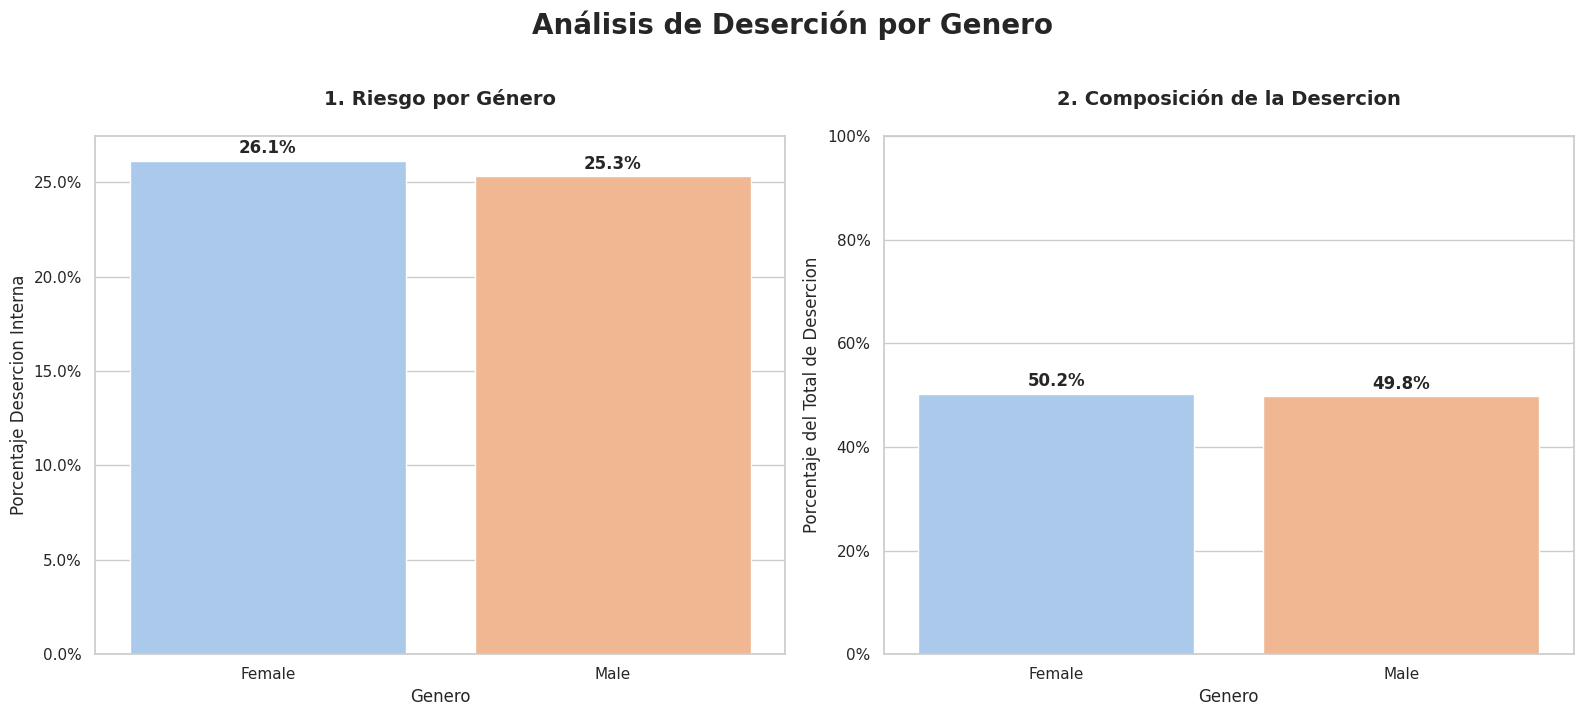

In [221]:
# Prepara los datos para el segundo gráfico (Composición del Total de fugas)
df_solo_fuga = df[df['Desercion'] == 1]
composicion_genero = df_solo_fuga['Genero'].value_counts(normalize=True) * 100

# Creacion de estructura: 1 fila, 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
sns.set_theme(style="whitegrid")

plt.suptitle('Análisis de Deserción por Genero', fontsize=20, fontweight='bold', y=1.02)

# --- GRÁFICO 1: TASA DE DESERCIÓN INTERNA (RIESGO) ---
sns.barplot(x='Genero', y=df['Desercion'] * 100, data=df,
            palette='pastel', ax=ax1, errorbar=None, hue='Genero', legend=False)

ax1.set_title('1. Riesgo por Género\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Porcentaje Desercion Interna')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

# --- GRÁFICO 2: COMPOSICIÓN DEL TOTAL (VOLUMEN) ---
sns.barplot(x=composicion_genero.index, y=composicion_genero.values,
            palette='pastel', ax=ax2, hue=composicion_genero.index, legend=False)

ax2.set_title('2. Composición de la Desercion\n', fontsize=14, fontweight='bold')
ax2.set_ylabel('Porcentaje del Total de Desercion')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylim(0, 100)

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

plt.tight_layout()
plt.show()

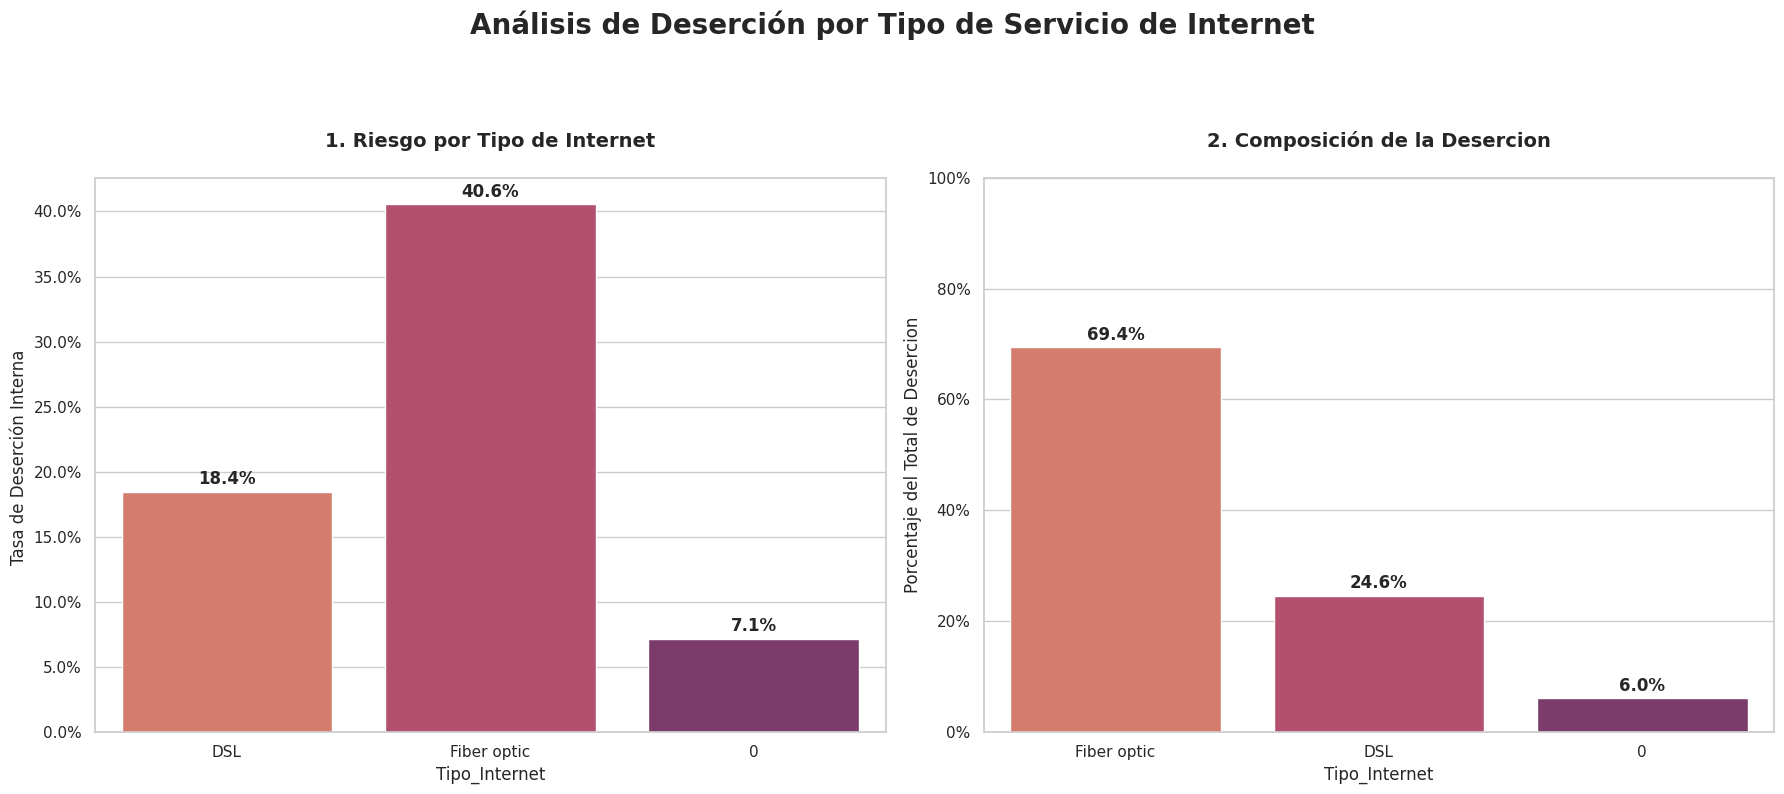

In [222]:
# Prepara los datos para el segundo gráfico (Composición del Total de fugas)
df_solo_fuga = df[df['Desercion'] == 1]
composicion_internet = df_solo_fuga['Tipo_Internet'].value_counts(normalize=True) * 100

# Creacio de estructura: 1 fila, 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
sns.set_theme(style="whitegrid")

# --- TÍTULO GENERAL DEL DASHBOARD ---
plt.suptitle('Análisis de Deserción por Tipo de Servicio de Internet', fontsize=20, fontweight='bold', y=1.02)

# --- GRÁFICO 1: TASA DE DESERCIÓN INTERNA (RIESGO) ---
sns.barplot(x='Tipo_Internet', y=df['Desercion'] * 100, data=df,
            palette='flare', ax=ax1, errorbar=None, hue='Tipo_Internet', legend=False)

ax1.set_title('1. Riesgo por Tipo de Internet\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Tasa de Deserción Interna ')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

# --- GRÁFICO 2: COMPOSICIÓN DEL TOTAL (VOLUMEN) ---
sns.barplot(x=composicion_internet.index, y=composicion_internet.values,
            palette='flare', ax=ax2, hue=composicion_internet.index, legend=False)

ax2.set_title('2. Composición de la Desercion\n', fontsize=14, fontweight='bold')
ax2.set_ylabel('Porcentaje del Total de Desercion')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylim(0, 100)

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

# Ajuste para que el título general no se pise con los subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

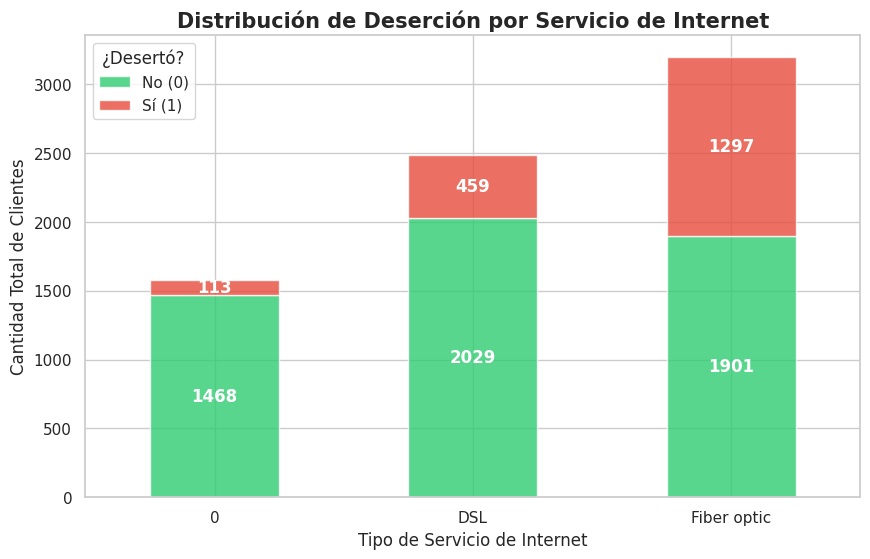

In [223]:
# Creacion de tabla cruzada (conteo de Churn por cada Servicio de Internet)
# crosstab pone una categoría en filas y la otra en columnas
tabla_internet = pd.crosstab(df['Tipo_Internet'], df['Desercion'])

# Creacion de gráfico apilado
ax = tabla_internet.plot(kind='bar',
                         stacked=True,
                         figsize=(10, 6),
                         color=['#2ecc71', '#e74c3c'], # Verde para "No" (0), Rojo para "Sí" (1)
                         alpha=0.8)

# Personalización
plt.title('Distribución de Deserción por Servicio de Internet', fontsize=15, fontweight='bold')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Cantidad Total de Clientes')
plt.xticks(rotation=0)
plt.legend(title='¿Desertó?', labels=['No (0)', 'Sí (1)'])

# Eetiquetas de valor en el centro de cada sección de la barra
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    if height > 0: # Solo poner etiqueta si hay datos
        ax.text(x + width/2, y + height/2, f'{int(height)}',
                ha='center', va='center', color='white', fontweight='bold')

plt.show()

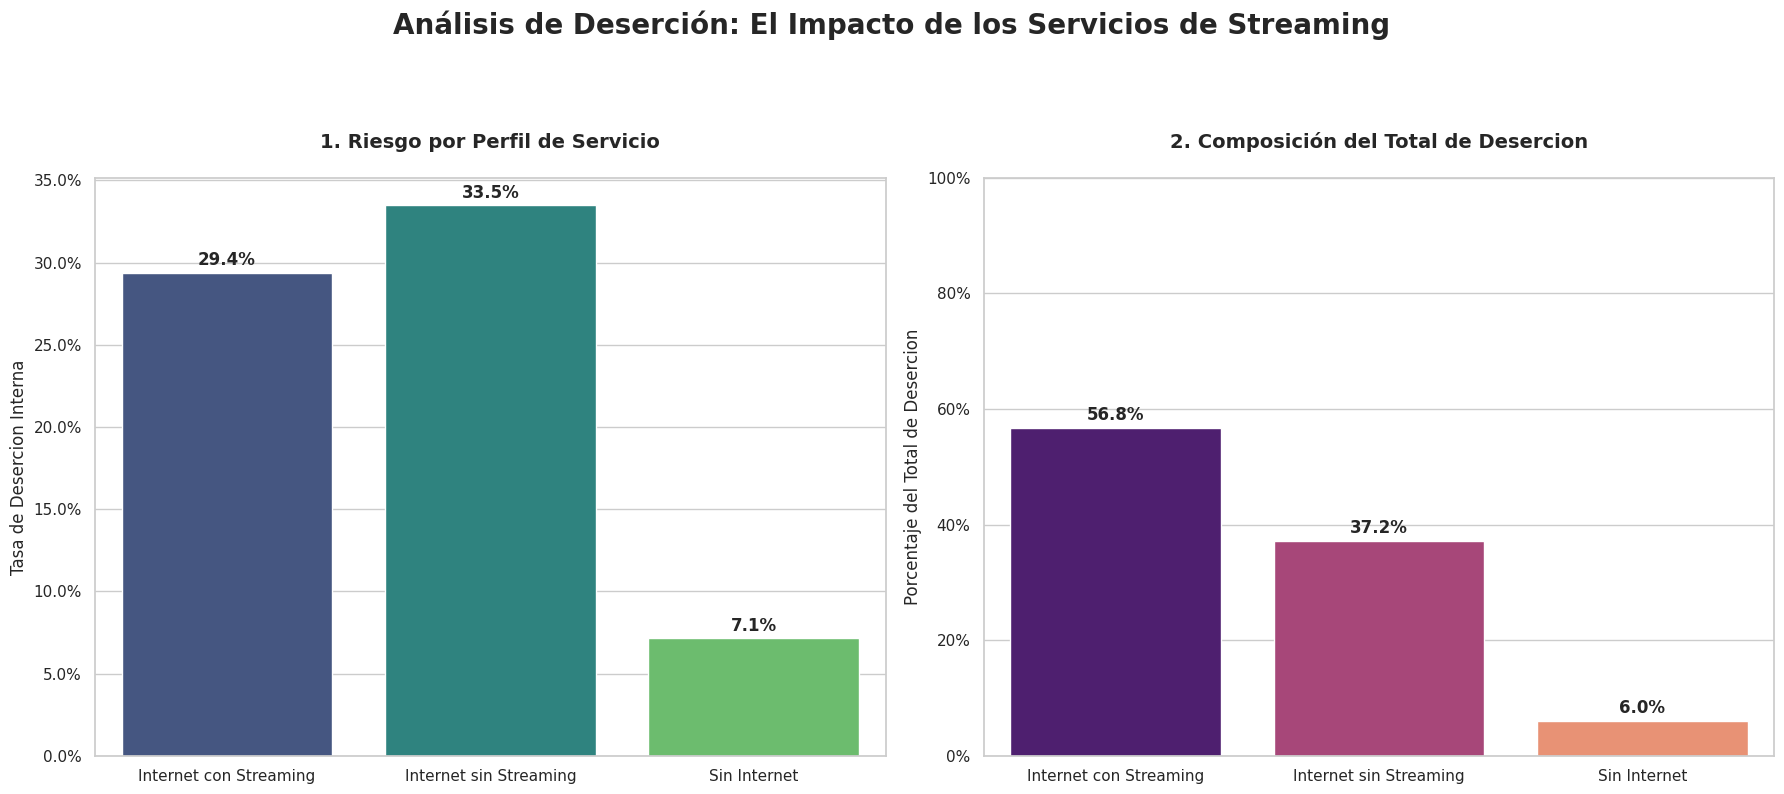

In [224]:
# --- PREPARACIÓN DE DATOS ---
# Columna lógica: ¿Tiene streaming?
df['tiene_streaming'] = ((df['Streaming_TV'] == 1) | (df['Streaming_Peliculas'] == 1)).astype(int)

# Clasificación del servicio
def clasificar_servicio(row):
    if row['Tipo_Internet'] == 0:
        return 'Sin Internet'
    elif row['tiene_streaming'] == 1:
        return 'Internet con Streaming'
    else:
        return 'Internet sin Streaming'

df['categoria_servicio'] = df.apply(clasificar_servicio, axis=1)

# Preparación para el gráfico de composición (Volumen total de desercion)
df_solo_fuga = df[df['Desercion'] == 1]
composicion_streaming = df_solo_fuga['categoria_servicio'].value_counts(normalize=True) * 100

# --- ESTRUCTURA VISUAL ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
sns.set_theme(style="whitegrid")

# TÍTULO GENERAL
plt.suptitle('Análisis de Deserción: El Impacto de los Servicios de Streaming',
             fontsize=20, fontweight='bold', y=1.02)

# --- GRÁFICO 1: RIESGO POR CATEGORÍA (Tasa Interna) ---
sns.barplot(x='categoria_servicio', y=df['Desercion'] * 100, data=df,
            palette='viridis', ax=ax1, errorbar=None, hue='categoria_servicio', legend=False)

ax1.set_title('1. Riesgo por Perfil de Servicio\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Tasa de Desercion Interna')
ax1.set_xlabel('')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

# --- GRÁFICO 2: COMPOSICIÓN DEL TOTAL (Volumen) ---
sns.barplot(x=composicion_streaming.index, y=composicion_streaming.values,
            palette='magma', ax=ax2, hue=composicion_streaming.index, legend=False)

ax2.set_title('2. Composición del Total de Desercion\n', fontsize=14,fontweight='bold')
ax2.set_ylabel('Porcentaje del Total de Desercion')
ax2.set_xlabel('')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylim(0, 100)

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

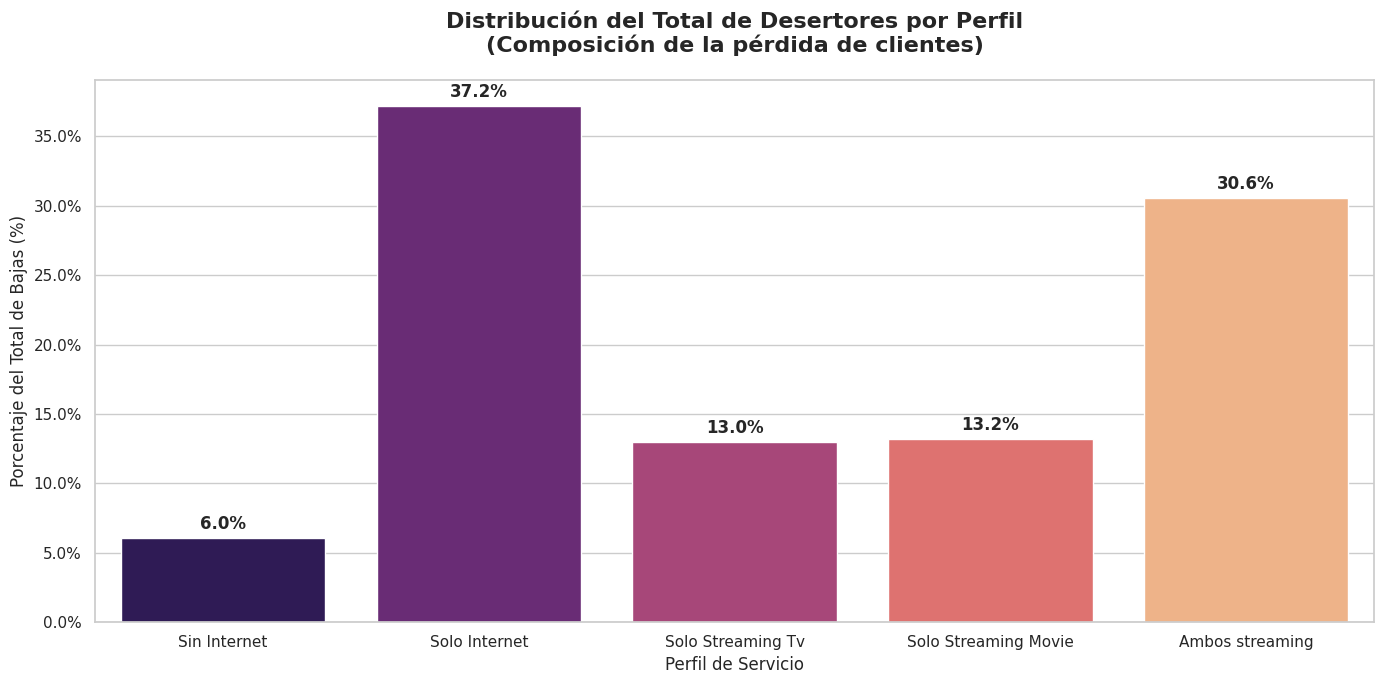

Total de clientes perdidos analizados: 1869


In [225]:
# El error KeyError: 'Perfil_Servicio' que aparece en tus imágenes ocurre porque estás intentando agrupar los datos por una columna que aún no existe dentro de tu nuevo DataFrame df_desertores.

# Cuando haces df_desertores = df[df['Desercion'] == 1].copy(), creas un subconjunto de los datos originales. Si la columna Perfil_Servicio se calculó anteriormente pero no se guardó en el df principal, o si simplemente no se ha definido para este nuevo objeto, Pandas no la encontrará.

# Aquí tienes el código completo y corregido para solucionar este problema:

# Código corregido (Solución al KeyError)
# Python

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# --- 1. PREPARACIÓN DE DATOS ---
# Filtramos primero
df_desertores = df[df['Desercion'] == 1].copy()

# CREACIÓN DE LA COLUMNA (Esencial para evitar el KeyError)
def clasificar_perfil_final(row):
    internet = row['Tipo_Internet']
    if internet == 0 or str(internet).strip() == '0':
        return 'Sin Internet'
    tv = row['Streaming_TV']
    movie = row['Streaming_Peliculas']
    if tv == 0 and movie == 0: return 'Solo Internet'
    elif tv == 1 and movie == 0: return 'Solo Streaming Tv'
    elif tv == 0 and movie == 1: return 'Solo Streaming Movie'
    elif tv == 1 and movie == 1: return 'Ambos streaming'
    return 'Otros'

# Aplicamos la función al nuevo DataFrame de desertores
df_desertores['Perfil_Servicio'] = df_desertores.apply(clasificar_perfil_final, axis=1)

# --- 2. CÁLCULO DE LA COMPOSICIÓN ---
total_personas_que_se_fueron = len(df_desertores)

# Ahora el groupby funcionará perfectamente
conteo_por_perfil = df_desertores.groupby('Perfil_Servicio')['Desercion'].count()
distribucion_percent = (conteo_por_perfil / total_personas_que_se_fueron) * 100

# Ordenamos según tu esquema
orden = ['Sin Internet', 'Solo Internet', 'Solo Streaming Tv', 'Solo Streaming Movie', 'Ambos streaming']
fila_distribucion = distribucion_percent.reindex(orden).fillna(0)

# --- 3. CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    x=fila_distribucion.index,
    y=fila_distribucion.values,
    palette='magma',
    hue=fila_distribucion.index,
    legend=False
)

# --- 4. PERSONALIZACIÓN Y FORMATO ---
plt.title('Distribución del Total de Desertores por Perfil\n(Composición de la pérdida de clientes)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Porcentaje del Total de Bajas (%)', fontsize=12)
plt.xlabel('Perfil de Servicio', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Etiquetas de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total de clientes perdidos analizados: {total_personas_que_se_fueron}")

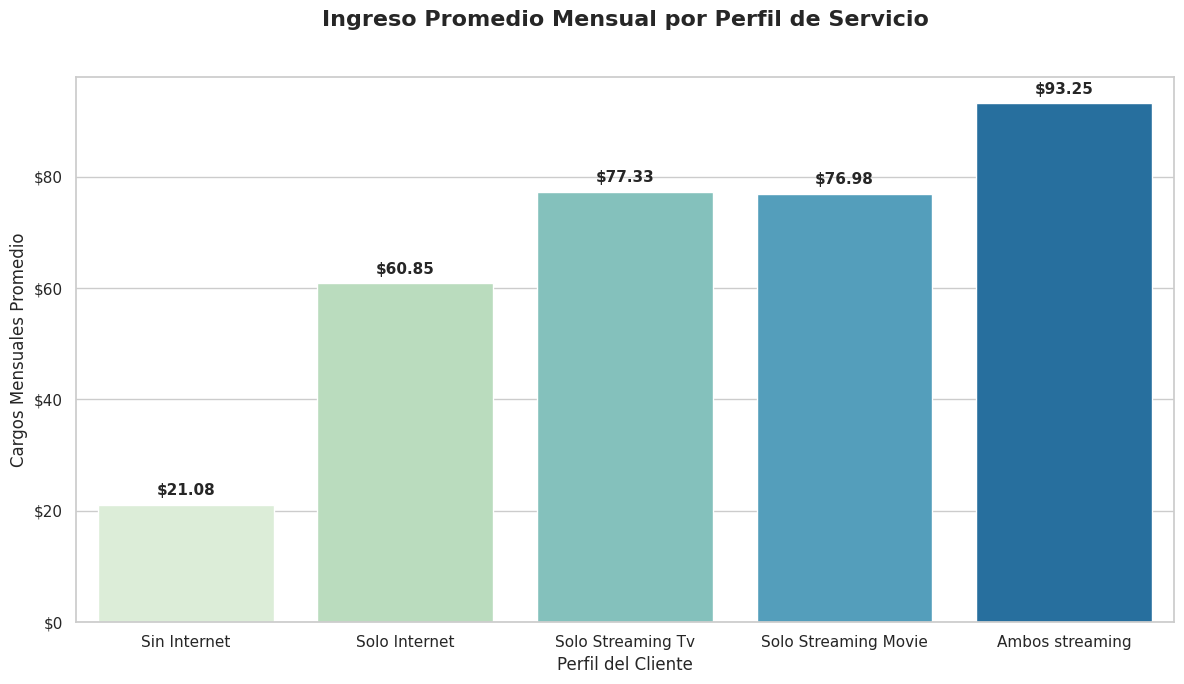


--- RESUMEN EJECUTIVO DE CARGOS MEDIOS ---


Perfil_Servicio,Sin Internet,Solo Internet,Solo Streaming Tv,Solo Streaming Movie,Ambos streaming
Valor Medio Mensual,21.08,60.85,77.33,76.98,93.25


In [226]:


# DEFINICIÓN DE LA LÓGICA DE PERFILADO ---
# Clasificacion de los usuarios según su combinación de conectividad y entretenimiento
def clasificar_perfil_final(row):
    # Detectamos si el cliente no tiene servicio de internet
    internet = row['Tipo_Internet']
    if internet == 0 or str(internet).strip() == '0':
        return 'Sin Internet'

    # Para los que tienen internet (DSL o Fibra), evaluamos el uso de Streaming
    tv = row['Streaming_TV']
    movie = row['Streaming_Peliculas']

    if tv == 0 and movie == 0:
        return 'Solo Internet'
    elif tv == 1 and movie == 0:
        return 'Solo Streaming Tv'
    elif tv == 0 and movie == 1:
        return 'Solo Streaming Movie'
    elif tv == 1 and movie == 1:
        return 'Ambos streaming'

    return 'Otros'

# PROCESAMIENTO DE DATOS ---
# Aplicacion de la función para crear la nueva columna de perfil
df['Perfil_Servicio'] = df.apply(clasificar_perfil_final, axis=1)



# Calcula el promedio de cargos por cada perfil de servicio
# Filtramos cargos > 0 para evitar errores con datos faltantes o cuentas de cortesía
analisis_perfiles = df[df['Cargos_Mensuales'] > 0].groupby('Perfil_Servicio')['Cargos_Mensuales'].mean()

# Define un orden lógico para la visualización de menor a mayor complejidad de servicio
orden_columnas = ['Sin Internet', 'Solo Internet', 'Solo Streaming Tv', 'Solo Streaming Movie', 'Ambos streaming']
analisis_perfiles = analisis_perfiles.reindex(orden_columnas)

# CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Uso de paleta de colores degradada (Gens) para mostrar el incremento de valor
ax = sns.barplot(x=analisis_perfiles.index,
                 y=analisis_perfiles.values,
                 palette='GnBu',
                 hue=analisis_perfiles.index,
                 legend=False)

# PERSONALIZACIÓN ---
plt.title('Ingreso Promedio Mensual por Perfil de Servicio\n',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Cargos Mensuales Promedio', fontsize=12)
plt.xlabel('Perfil del Cliente', fontsize=12)

# Formatea el eje Y como moneda
formatter = mtick.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# AÑADIR ETIQUETAS DE VALOR SOBRE LAS BARRAS ---
for p in ax.patches:
    valor = p.get_height()
    if valor > 0:
        ax.annotate(f'${valor:,.2f}',
                    (p.get_x() + p.get_width() / 2., valor),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# TABLA RESUMEN (HORIZONTAL) ---
tabla_final = analisis_perfiles.to_frame().T
tabla_final.index = ['Valor Medio Mensual']
print("\n--- RESUMEN EJECUTIVO DE CARGOS MEDIOS ---")
display(tabla_final.round(2))

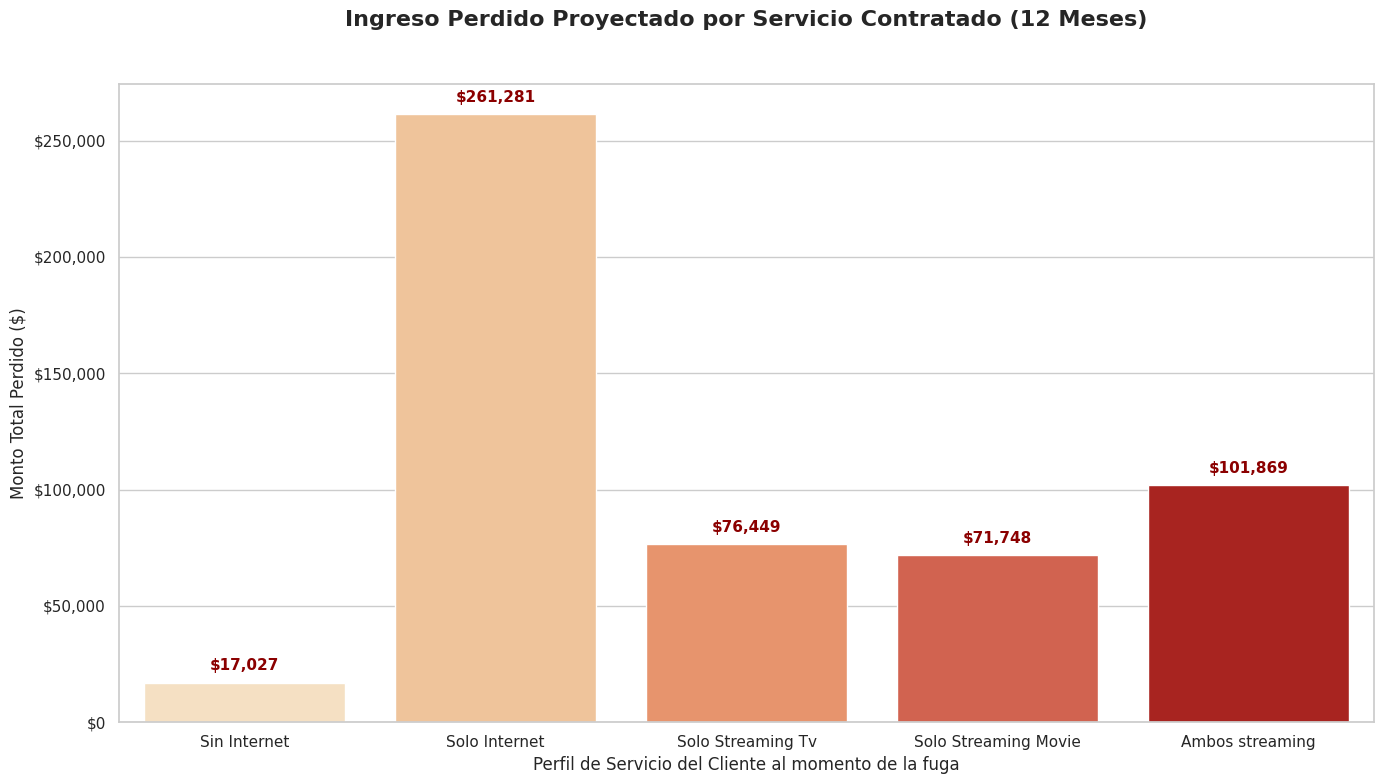

--- RESUMEN DE PÉRDIDA POR PERFIL ---
Perfil Sin Internet          : $17,026.80
Perfil Solo Internet         : $261,280.85
Perfil Solo Streaming Tv     : $76,448.85
Perfil Solo Streaming Movie  : $71,748.45
Perfil Ambos streaming       : $101,868.80


In [227]:
# PREPARA DE LA DATA FINANCIERA Y PERFILADO ---
# Filtramos solo a los clientes que se fueron (Desercion == 1)
df_dinero = df[df['Desercion'] == 1].copy()

# Re-aplicamos la función de clasificación para asegurar que los grupos existan en este subset
def clasificar_perfil_final(row):
    internet = row['Tipo_Internet']
    if internet == 0 or str(internet).strip() == '0':
        return 'Sin Internet'

    tv = row['Streaming_TV']
    movie = row['Streaming_Peliculas']

    if tv == 0 and movie == 0:
        return 'Solo Internet'
    elif tv == 1 and movie == 0:
        return 'Solo Streaming Tv'
    elif tv == 0 and movie == 1:
        return 'Solo Streaming Movie'
    elif tv == 1 and movie == 1:
        return 'Ambos streaming'
    return 'Otros'

# Creacion de la columna de perfil en el dataframe de desertores
df_dinero['Perfil_Servicio'] = df_dinero.apply(clasificar_perfil_final, axis=1)

# CÁLCULO DE LA PÉRDIDA PROYECTADA (12 MESES) ---
# Calcular meses restantes del ciclo anual (12 - antigüedad)
df_dinero['meses_faltantes'] = df_dinero['Meses_Permanencia'].apply(lambda x: max(0, 12 - x))

# Multiplicacion del cargo mensual por los meses no percibidos
df_dinero['perdida_proyectada'] = df_dinero['Cargos_Mensuales'] * df_dinero['meses_faltantes']

# AGRUPA PERFIL DE SERVICIO ---
impacto_por_perfil = df_dinero.groupby('Perfil_Servicio')['perdida_proyectada'].sum()

# Orden lógico para que el gráfico sea fácil de leer
orden_columnas = ['Sin Internet', 'Solo Internet', 'Solo Streaming Tv', 'Solo Streaming Movie', 'Ambos streaming']
impacto_por_perfil = impacto_por_perfil.reindex(orden_columnas).fillna(0)

# CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Paleta de rojos degradada para resaltar el impacto financiero
ax = sns.barplot(x=impacto_por_perfil.index,
                 y=impacto_por_perfil.values,
                 palette='OrRd',
                 hue=impacto_por_perfil.index,
                 legend=False)

# PERSONALIZACIÓN ---
plt.title('Ingreso Perdido Proyectado por Servicio Contratado (12 Meses)\n',
          fontsize=16, fontweight='bold', pad=25)

plt.ylabel('Monto Total Perdido ($)', fontsize=12)
plt.xlabel('Perfil de Servicio del Cliente al momento de la fuga', fontsize=12)

# Formato de moneda para el eje Y
formatter = mtick.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# AÑADE ETIQUETAS DE VALOR SOBRE LAS BARRAS ---
for p in ax.patches:
    valor = p.get_height()
    if valor > 0:
        ax.annotate(f'${valor:,.0f}',
                    (p.get_x() + p.get_width() / 2., valor),
                    ha='center', va='center',
                    xytext=(0, 12),
                    textcoords='offset points',
                    fontsize=11, fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

# --- 7. RESUMEN EJECUTIVO ---
print(f"--- RESUMEN DE PÉRDIDA POR PERFIL ---")
for perfil, monto in impacto_por_perfil.items():
    print(f"Perfil {perfil:22}: ${monto:,.2f}")

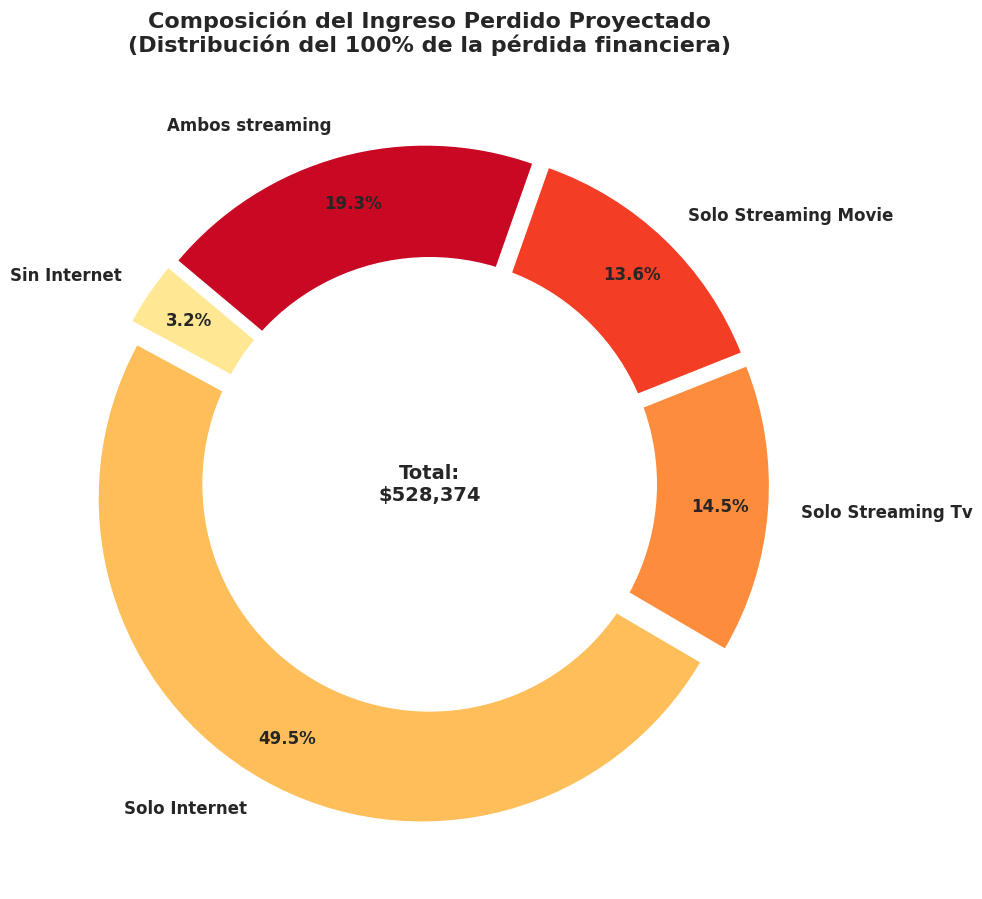

In [228]:
# PREPARACIÓN DE DATOS ---
# Uso del dataframe de desertores
# Agrupacion de la pérdida proyectada por Perfil de Servicio
datos_pie = df_dinero.groupby('Perfil_Servicio')['perdida_proyectada'].sum()

# Orden de las Columnas
orden_columnas = ['Sin Internet', 'Solo Internet', 'Solo Streaming Tv', 'Solo Streaming Movie', 'Ambos streaming']
datos_pie = datos_pie.reindex(orden_columnas).fillna(0)

# CONFIGURACIÓN DEL GRÁFICO ---
plt.figure(figsize=(10, 10))
sns.set_style("white") # Estilo limpio para gráficos de torta

# Definicion de paleta de colores
colores = sns.color_palette('YlOrRd', n_colors=len(datos_pie))

# CREACIÓN DEL GRÁFICO DE TORTA ---
plt.pie(
    datos_pie,
    labels=datos_pie.index,
    autopct='%1.1f%%',       # Muestra el porcentaje con un decimal
    startangle=140,          # Rota el gráfico para mejor lectura
    colors=colores,
    pctdistance=0.85,        # Distancia de los números al centro
    explode=[0.05] * len(datos_pie), # Separa un poco las tajadas para dar relieve
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# FORMATO DE DONA (Opcional, lo hace ver más moderno) ---
# Dibujamos un círculo blanco en el centro para convertirlo en dona
centro_circulo = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# TÍTULOS Y LEYENDA ---
plt.title('Composición del Ingreso Perdido Proyectado\n(Distribución del 100% de la pérdida financiera)',
          fontsize=16, fontweight='bold', pad=20)

# Añadimos un texto en el centro con la pérdida total
total_perdida = datos_pie.sum()
plt.text(0, 0, f'Total:\n${total_perdida:,.0f}', ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

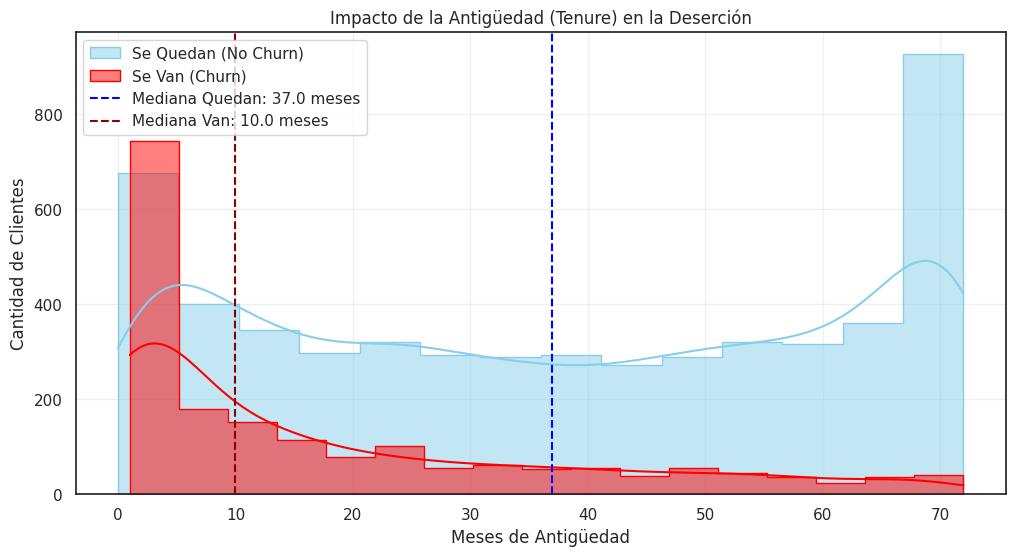

Mediana de antigüedad de los que se van: 10.0 meses
Mediana de antigüedad de los que se quedan: 37.0 meses


In [229]:
# Separacion de los datos para calcular métricas por grupo
churn_si = df[df['Desercion'] == 1]['Meses_Permanencia']
churn_no = df[df['Desercion'] == 0]['Meses_Permanencia']

# Creacion de la visualización
plt.figure(figsize=(12, 6))

# Histograma superpuesto
sns.histplot(churn_no, color="skyblue", label="Se Quedan (No Churn)", kde=True, element="step")
sns.histplot(churn_si, color="red", label="Se Van (Churn)", kde=True, element="step")

# Líneas de mediana para cada grupo
plt.axvline(churn_no.median(), color='blue', linestyle='--', label=f'Mediana Quedan: {churn_no.median()} meses')
plt.axvline(churn_si.median(), color='darkred', linestyle='--', label=f'Mediana Van: {churn_si.median()} meses')

plt.title('Impacto de la Antigüedad (Tenure) en la Deserción')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Cantidad de Clientes')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Mediana de antigüedad de los que se van: {churn_si.median()} meses")
print(f"Mediana de antigüedad de los que se quedan: {churn_no.median()} meses")

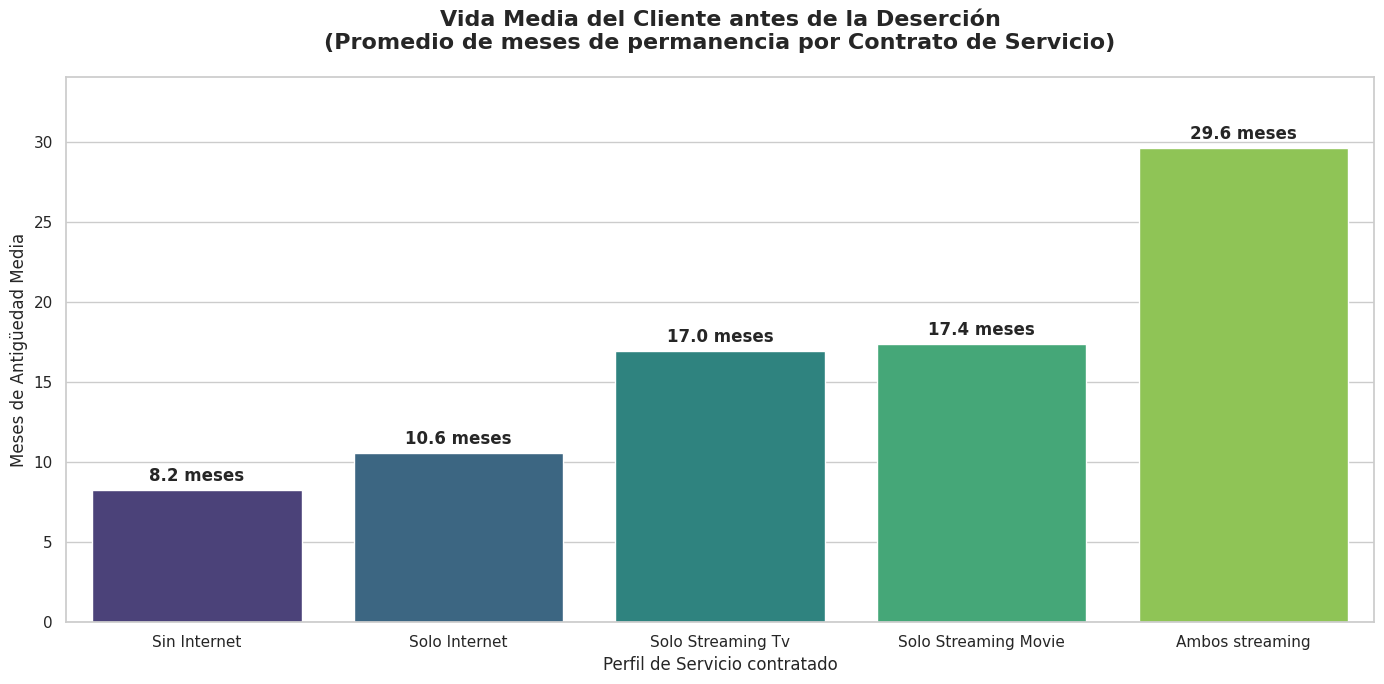

In [230]:

# PREPARACIÓN DE DATA (Solo Desertores) ---
df_desertores = df[df['Desercion'] == 1].copy()

# Re-aplicamos la función de clasificación de perfiles
def clasificar_perfil_final(row):
    internet = row['Tipo_Internet']
    if internet == 0 or str(internet).strip() == '0':
        return 'Sin Internet'
    tv = row['Streaming_TV']
    movie = row['Streaming_Peliculas']
    if tv == 0 and movie == 0: return 'Solo Internet'
    elif tv == 1 and movie == 0: return 'Solo Streaming Tv'
    elif tv == 0 and movie == 1: return 'Solo Streaming Movie'
    elif tv == 1 and movie == 1: return 'Ambos streaming'
    return 'Otros'

df_desertores['Perfil_Servicio'] = df_desertores.apply(clasificar_perfil_final, axis=1)

# CÁLCULO DE MEDIAS ---
orden_perfiles = ['Sin Internet', 'Solo Internet', 'Solo Streaming Tv', 'Solo Streaming Movie', 'Ambos streaming']
# Calculamos la media de antigüedad (Tenure) por perfil
media_permanencia = df_desertores.groupby('Perfil_Servicio')['Meses_Permanencia'].mean().reindex(orden_perfiles)

# CREACIÓN DEL GRÁFICO UNIFICADO ---
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

# Usamos un degradado de color para diferenciar los niveles de servicio
ax = sns.barplot(
    x=media_permanencia.index,
    y=media_permanencia.values,
    palette='viridis',
    hue=media_permanencia.index,
    legend=False
)

# PERSONALIZACIÓN ---
plt.title('Vida Media del Cliente antes de la Deserción\n(Promedio de meses de permanencia por Contrato de Servicio)',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Meses de Antigüedad Media', fontsize=12)
plt.xlabel('Perfil de Servicio contratado', fontsize=12)

# Añadir las etiquetas de valor sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f} meses',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12, fontweight='bold')

# Ajustar límites para que las etiquetas no se corten
plt.ylim(0, media_permanencia.max() * 1.15)

plt.tight_layout()
plt.show()

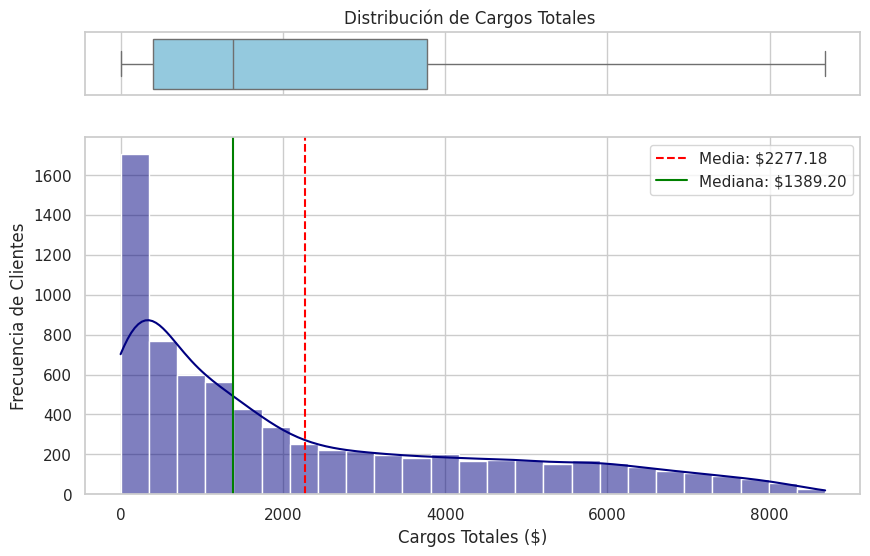

Desviación Estándar: $2268.65


In [231]:
# Calculo de las métricas
media = df['Cargos_Totales'].mean()
mediana = df['Cargos_Totales'].median()
desv_std = df['Cargos_Totales'].std()

# Creacion la figura con dos subgráficos
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))

# Boxplot para ver valores atípicos (outliers)
sns.boxplot(x=df['Cargos_Totales'], ax=ax_box, color="skyblue")
ax_box.set(title='Distribución de Cargos Totales ', xlabel='')

# Histograma con la curva de densidad
sns.histplot(x=df['Cargos_Totales'], ax=ax_hist, kde=True, color="navy")

# Líneas de referencia para Media y Mediana
ax_hist.axvline(media, color='red', linestyle='--', label=f'Media: ${media:.2f}')
ax_hist.axvline(mediana, color='green', linestyle='-', label=f'Mediana: ${mediana:.2f}')

plt.legend()
plt.xlabel('Cargos Totales ($)')
plt.ylabel('Frecuencia de Clientes')
plt.show()

print(f"Desviación Estándar: ${desv_std:.2f}")

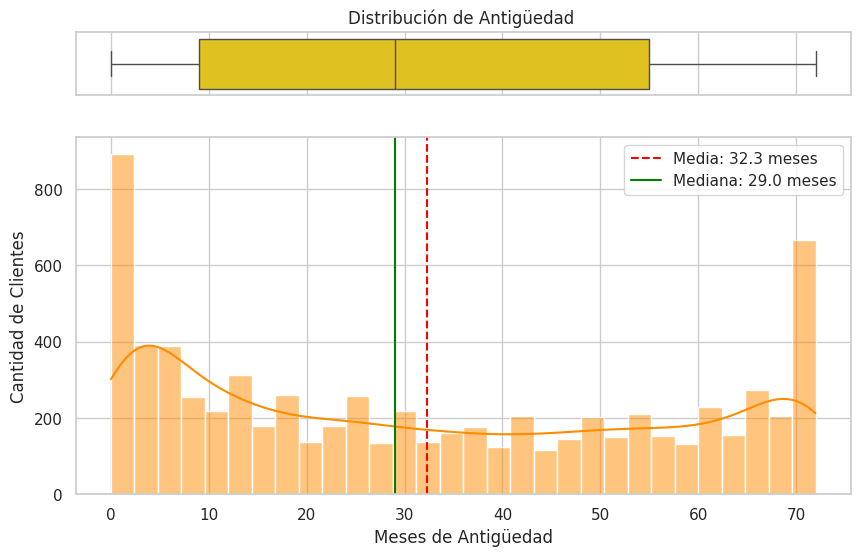

Estadísticas de Tenure:
- Promedio de permanencia: 32.3 meses
- Valor central: 29.0 meses
- Desviación Estándar: 24.6 meses


In [232]:
# Calcula las métricas para Antiguedad
media_t = df['Meses_Permanencia'].mean()
mediana_t = df['Meses_Permanencia'].median()
desv_std_t = df['Meses_Permanencia'].std()

# Crea la visualización
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))

# Boxplot
sns.boxplot(x=df['Meses_Permanencia'], ax=ax_box, color="gold")
ax_box.set(title='Distribución de Antigüedad ', xlabel='')

# Histograma con KDE
sns.histplot(x=df['Meses_Permanencia'], ax=ax_hist, kde=True, color="darkorange", bins=30)

# Líneas de referencia
ax_hist.axvline(media_t, color='red', linestyle='--', label=f'Media: {media_t:.1f} meses')
ax_hist.axvline(mediana_t, color='green', linestyle='-', label=f'Mediana: {mediana_t:.1f} meses')

plt.legend()
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Cantidad de Clientes')
plt.show()

print(f"Estadísticas de Tenure:")
print(f"- Promedio de permanencia: {media_t:.1f} meses")
print(f"- Valor central: {mediana_t:.1f} meses")
print(f"- Desviación Estándar: {desv_std_t:.1f} meses")

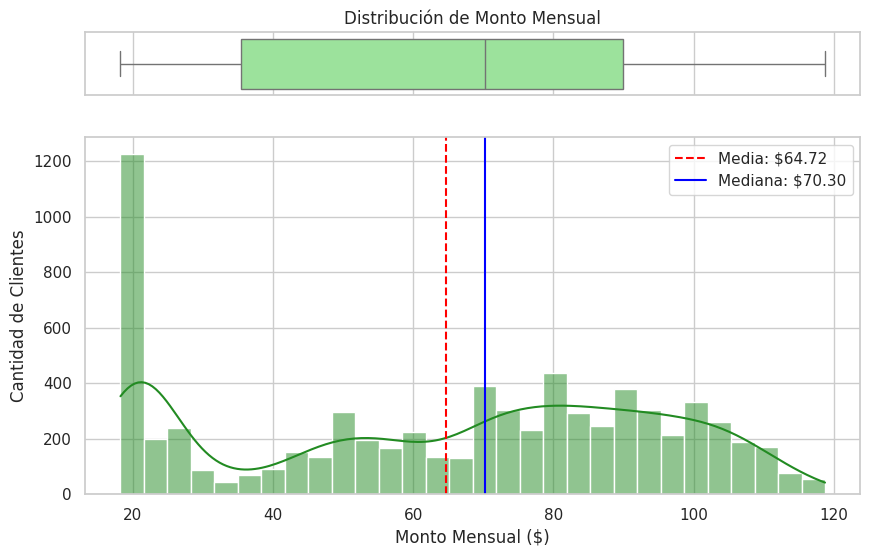

Estadísticas de Monto Mensual:
- Facturación promedio: $64.72
- Mediana de factura: $70.30
- Desviación Estándar: $30.13


In [233]:
# Calcula las métricas para Cargos Menuslaes
media_m = df['Cargos_Mensuales'].mean()
mediana_m = df['Cargos_Mensuales'].median()
desv_std_m = df['Cargos_Mensuales'].std()

# Crea la visualización
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))

# Boxplot
sns.boxplot(x=df['Cargos_Mensuales'], ax=ax_box, color="lightgreen")
ax_box.set(title='Distribución de Monto Mensual', xlabel='')

# Histograma con KDE
sns.histplot(x=df['Cargos_Mensuales'], ax=ax_hist, kde=True, color="forestgreen", bins=30)

# Líneas de referencia
ax_hist.axvline(media_m, color='red', linestyle='--', label=f'Media: ${media_m:.2f}')
ax_hist.axvline(mediana_m, color='blue', linestyle='-', label=f'Mediana: ${mediana_m:.2f}')

plt.legend()
plt.xlabel('Monto Mensual ($)')
plt.ylabel('Cantidad de Clientes')
plt.show()

print(f"Estadísticas de Monto Mensual:")
print(f"- Facturación promedio: ${media_m:.2f}")
print(f"- Mediana de factura: ${mediana_m:.2f}")
print(f"- Desviación Estándar: ${desv_std_m:.2f}")

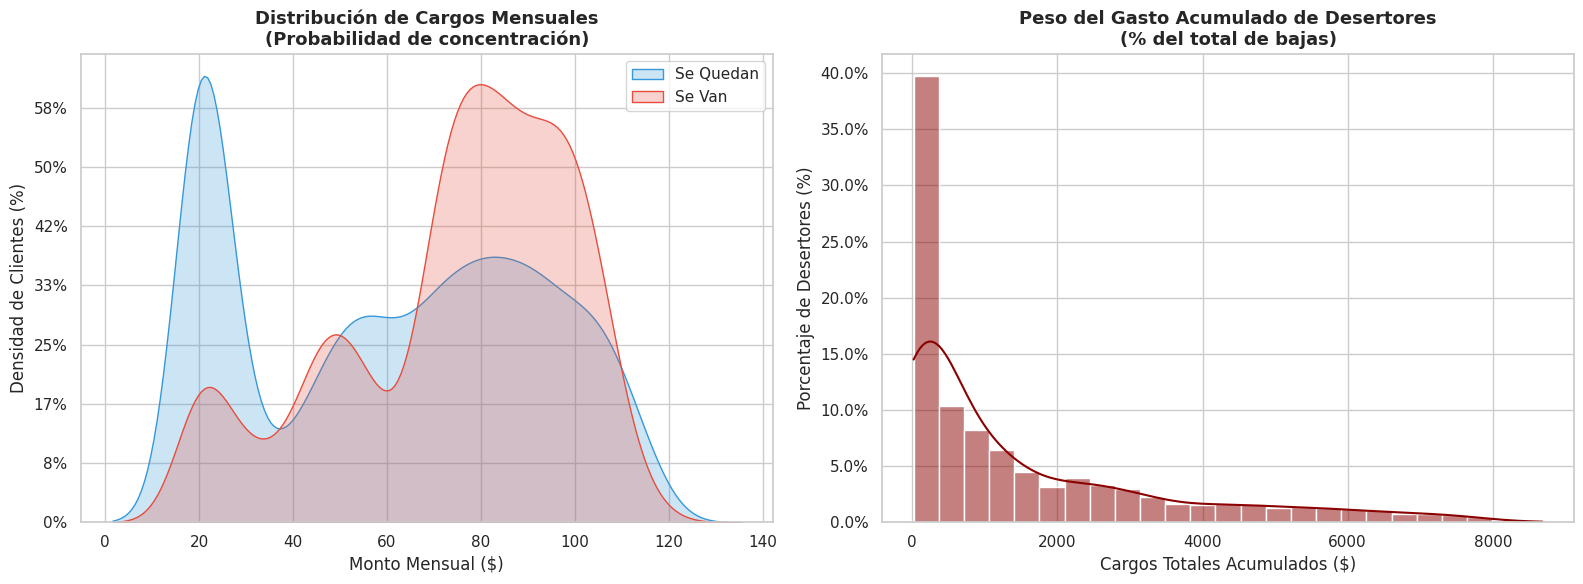

--------------------------------------------------
RESUMEN FINANCIERO DE LA DESERCIÓN
--------------------------------------------------
Monto Mensual Promedio de los que se van:    $74.44
Monto Mensual Promedio de los que se quedan: $61.35
Pérdida Total acumulada (Histórico):         $2862926.90
--------------------------------------------------


In [234]:
# Filtra los datos de los que se van
df_churn_si = df[df['Desercion'] == 1].copy()
df_churn_no = df[df['Desercion'] == 0].copy()

# Crea la comparativa visual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_theme(style="whitegrid")

# GRÁFICO A: Densidad de Monto Mensual ---
# Usamos common_norm=False para que cada curva se normalice de forma independiente
sns.kdeplot(df_churn_no['Cargos_Mensuales'], ax=axes[0], fill=True, color="#3498db", label="Se Quedan")
sns.kdeplot(df_churn_si['Cargos_Mensuales'], ax=axes[0], fill=True, color="#e74c3c", label="Se Van")

axes[0].set_title('Distribución de Cargos Mensuales\n(Probabilidad de concentración)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Monto Mensual ($)')
axes[0].set_ylabel('Densidad de Clientes (%)')

# Convierte la densidad en formato porcentaje (opcional para KDE, pero ayuda a la lectura)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=0.03)) # Ajustamos el factor de escala
axes[0].legend()

# GRÁFICO B: Cargos Totales acumulados ---
# stat='percent' convierte las frecuencias en porcentajes del total
sns.histplot(df_churn_si['Cargos_Totales'], ax=axes[1], color="darkred", kde=True, stat="percent")

axes[1].set_title('Peso del Gasto Acumulado de Desertores\n(% del total de bajas)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Cargos Totales Acumulados ($)')
axes[1].set_ylabel('Porcentaje de Desertores (%)')

# Aplica el formato de % al eje Y
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()

# 3. Métricas clave de la pérdida
print("-" * 50)
print(f"RESUMEN FINANCIERO DE LA DESERCIÓN")
print("-" * 50)
print(f"Monto Mensual Promedio de los que se van:    ${df_churn_si['Cargos_Mensuales'].mean():.2f}")
print(f"Monto Mensual Promedio de los que se quedan: ${df_churn_no['Cargos_Mensuales'].mean():.2f}")
print(f"Pérdida Total acumulada (Histórico):         ${df_churn_si['Cargos_Totales'].sum():.2f}")
print("-" * 50)

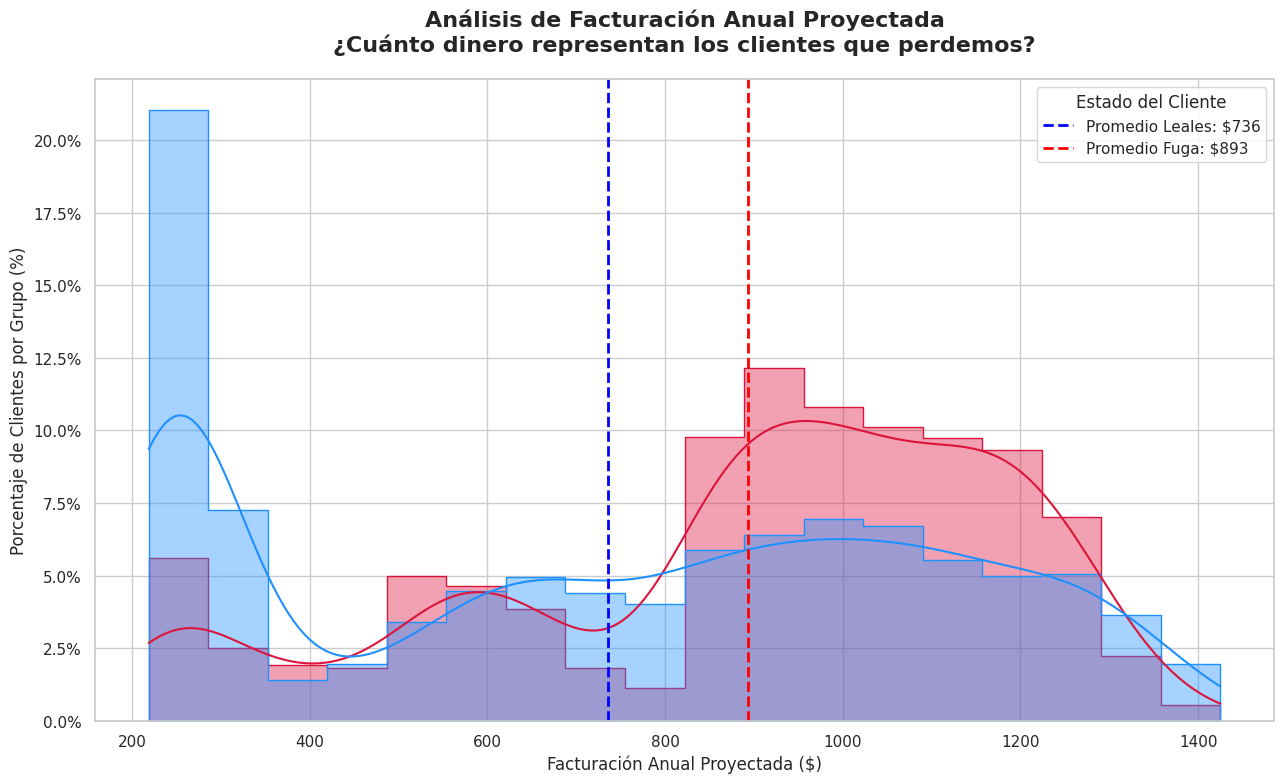

--- RESUMEN FINANCIERO ---
Facturación anual media de clientes Leales: $736.25
Facturación anual media de clientes en Fuga: $893.30
Diferencia de valor: $157.05


In [235]:
# --- 1. PREPARACIÓN DE DATOS ---
# Aseguramos que la columna de facturación anual exista
df['AnnualCharges'] = df['Cargos_Mensuales'] * 12

# Mapeamos los valores de Desercion para que la leyenda salga perfecta automáticamente
# 0 -> 'Leales', 1 -> 'Fuga'
df['Estado_Cliente'] = df['Desercion'].map({0: 'Leales', 1: 'Fuga'})

# --- 2. CÁLCULO DE MÉTRICAS PARA LÍNEAS DE MEDIA ---
quedan_mean = df[df['Desercion'] == 0]['AnnualCharges'].mean()
se_van_mean = df[df['Desercion'] == 1]['AnnualCharges'].mean()

# --- 3. CONFIGURACIÓN DEL GRÁFICO ---
plt.figure(figsize=(13, 8))
sns.set_theme(style="whitegrid")

# Histograma con densidad (KDE)
# Usamos 'Estado_Cliente' en hue para que la leyenda sea automática y correcta
ax = sns.histplot(
    data=df,
    x='AnnualCharges',
    hue='Estado_Cliente',
    element="step",         # Evita solapamiento confuso
    stat="percent",         # Eje Y en porcentaje real
    common_norm=False,      # Cada grupo suma su propio 100%
    palette={'Leales': 'dodgerblue', 'Fuga': 'crimson'},
    alpha=0.4,
    kde=True
)

# --- 4. AÑADIR LÍNEAS DE MEDIA ---
plt.axvline(quedan_mean, color='blue', linestyle='--', linewidth=2,
            label=f'Promedio Leales: ${quedan_mean:,.0f}')

plt.axvline(se_van_mean, color='red', linestyle='--', linewidth=2,
            label=f'Promedio Fuga: ${se_van_mean:,.0f}')

# --- 5. FORMATO Y ESTILO ---
# Formato de porcentaje para el eje Y
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Títulos y etiquetas
plt.title('Análisis de Facturación Anual Proyectada\n¿Cuánto dinero representan los clientes que perdemos?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Facturación Anual Proyectada ($)', fontsize=12)
plt.ylabel('Porcentaje de Clientes por Grupo (%)', fontsize=12)

# Ajuste de la leyenda (une las etiquetas del histograma y las líneas)
plt.legend(title="Estado del Cliente", fontsize=11)

plt.tight_layout()
plt.show()

# --- 6. RESUMEN EJECUTIVO (Opcional para tu reporte) ---
print(f"--- RESUMEN FINANCIERO ---")
print(f"Facturación anual media de clientes Leales: ${quedan_mean:,.2f}")
print(f"Facturación anual media de clientes en Fuga: ${se_van_mean:,.2f}")
print(f"Diferencia de valor: ${abs(se_van_mean - quedan_mean):,.2f}")

<Figure size 1000x600 with 0 Axes>

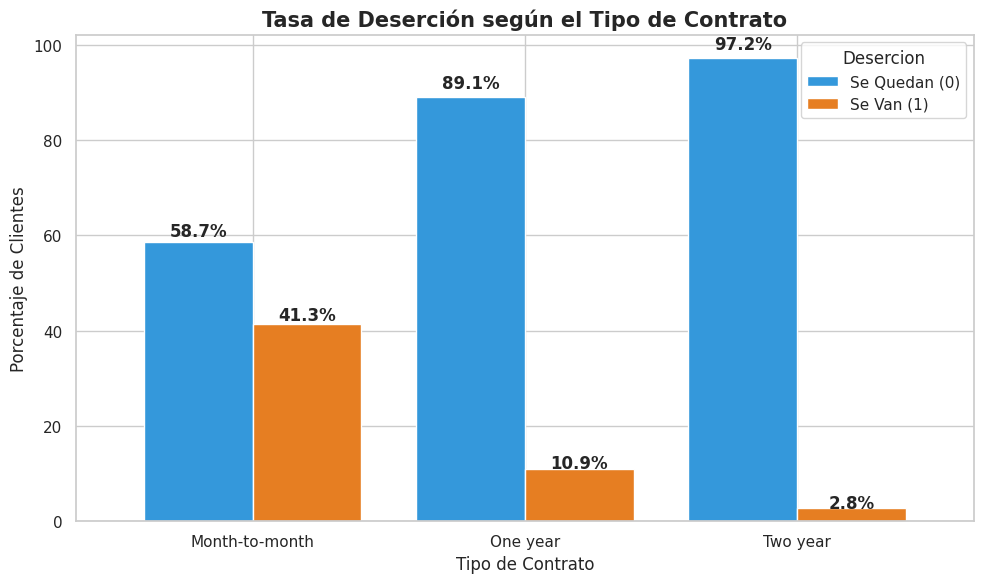

In [236]:
# Calcula la proporción de deserción por tipo de contrato
contrato_churn = pd.crosstab(df['Tipo_Contrato'], df['Desercion'], normalize='index') * 100

# Visualización de barras agrupadas para mayor claridad
plt.figure(figsize=(10, 6))
ax = contrato_churn.plot(kind='bar', color=['#3498db', '#e67e22'], figsize=(10, 6), width=0.8)

plt.title('Tasa de Deserción según el Tipo de Contrato', fontsize=15, fontweight='bold')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Desercion', labels=['Se Quedan (0)', 'Se Van (1)'])

# Añadir etiquetas de porcentaje sobre las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

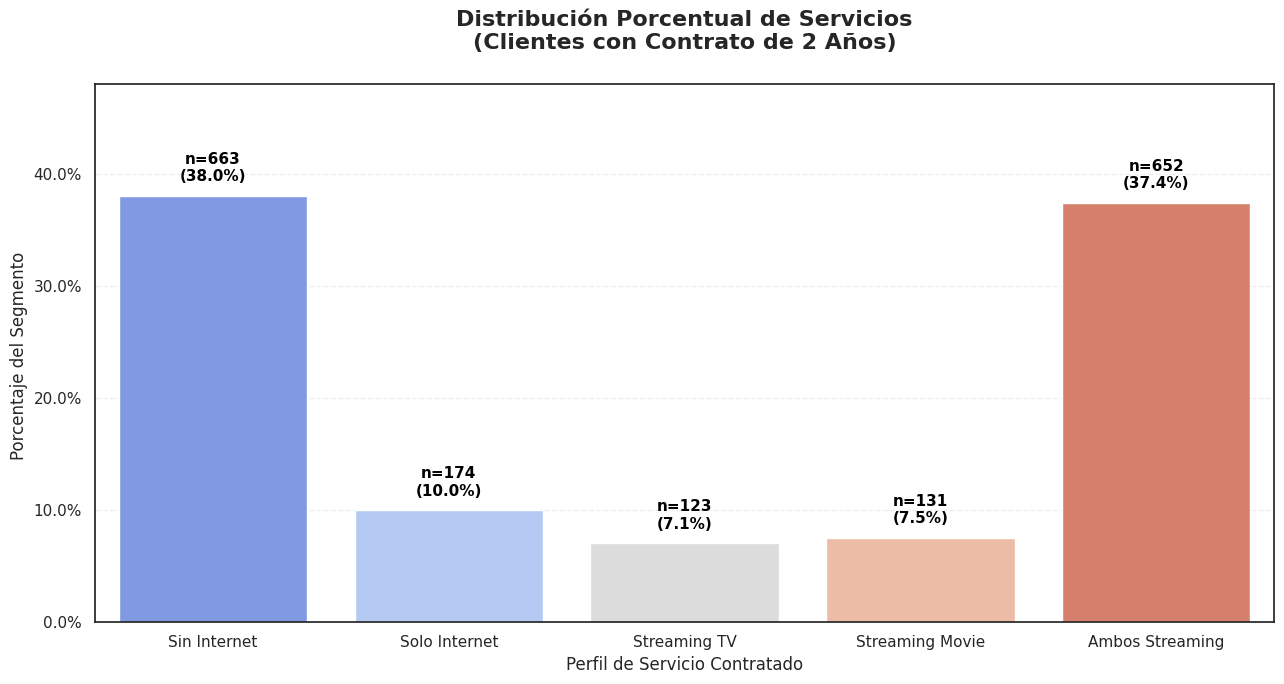

In [237]:
# Define the function clasificar_servicios_desagregados within the cell
def clasificar_servicios_desagregados(row):
    internet = row['Tipo_Internet']
    if internet == 0 or str(internet).strip() == '0':
        return 'Sin Internet'

    tv = row['Streaming_TV']
    movie = row['Streaming_Peliculas']

    if tv == 0 and movie == 0:
        return 'Solo Internet'
    elif tv == 1 and movie == 0:
        return 'Streaming TV'
    elif tv == 0 and movie == 1:
        return 'Streaming Movie'
    elif tv == 1 and movie == 1:
        return 'Ambos Streaming'
    return 'Otros'

# 1. Filtramos: Solo clientes con Contrato de 2 años
df_2_anos = df[df['Tipo_Contrato'] == 'Two year'].copy()

# 2. Aplicamos la clasificación desagregada (usando la función que ya está definida)
df_2_anos['Perfil_Servicio_2Anos'] = df_2_anos.apply(clasificar_servicios_desagregados, axis=1)

# 3. Calculamos la distribución (frecuencia y porcentaje)
total_2_anos = len(df_2_anos)
conteo_datos = df_2_anos['Perfil_Servicio_2Anos'].value_counts()
porcentajes = (conteo_datos / total_2_anos) * 100

# 4. Ordenamos para que el gráfico sea consistente
orden = ['Sin Internet', 'Solo Internet', 'Streaming TV', 'Streaming Movie', 'Ambos Streaming']
porcentajes = porcentajes.reindex(orden).fillna(0)
conteo_datos = conteo_datos.reindex(orden).fillna(0)

# --- VISUALIZACIÓN ---
plt.figure(figsize=(13, 7))
sns.set_theme(style="white")

# Creamos el gráfico de barras
ax = sns.barplot(x=porcentajes.index, y=porcentajes.values, palette='coolwarm', hue=porcentajes.index, legend=False)

# 5. PERSONALIZACIÓN DEL EJE Y (En formato %)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(0, porcentajes.max() + 10) # Damos espacio arriba para las etiquetas

# 6. AÑADIR ETIQUETAS DOBLES (N y %)
for i, p in enumerate(ax.patches):
    # Obtenemos el conteo y el porcentaje para ese perfil
    valor_n = int(conteo_datos.iloc[i])
    valor_pct = porcentajes.iloc[i]

    # Escribimos el texto sobre la barra
    ax.annotate(f'n={valor_n}\n({valor_pct:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 20),
                textcoords='offset points',
                fontsize=11, fontweight='bold', color='black')

plt.title('Distribución Porcentual de Servicios\n(Clientes con Contrato de 2 Años)', fontsize=16, pad=25, fontweight='bold')
plt.ylabel('Porcentaje del Segmento ', fontsize=12)
plt.xlabel('Perfil de Servicio Contratado', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

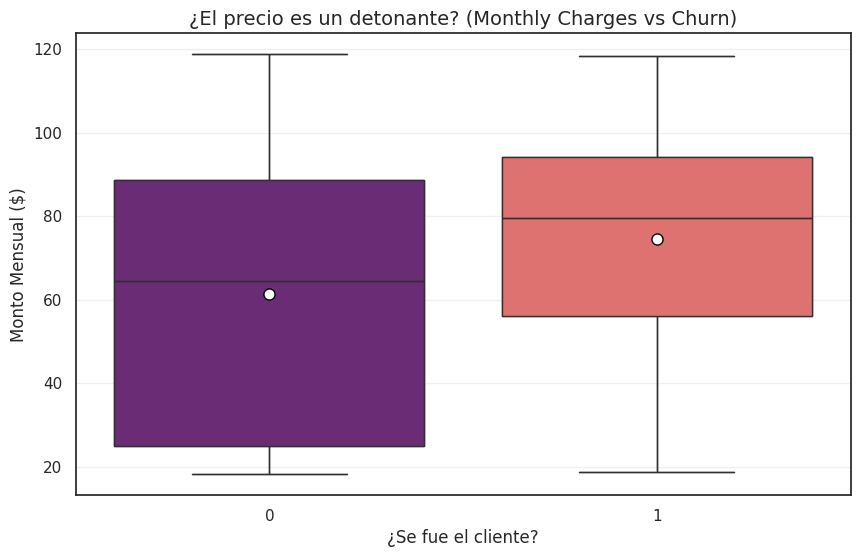

In [238]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Desercion', y='Cargos_Mensuales', data=df, hue='Desercion', palette='magma', legend=False)
sns.boxplot(x='Desercion', y='Cargos_Mensuales', data=df, hue='Desercion',
            palette='magma', legend=False, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
plt.title('¿El precio es un detonante? (Monthly Charges vs Churn)', fontsize=14)
plt.xlabel('¿Se fue el cliente?', fontsize=12)
plt.ylabel('Monto Mensual ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

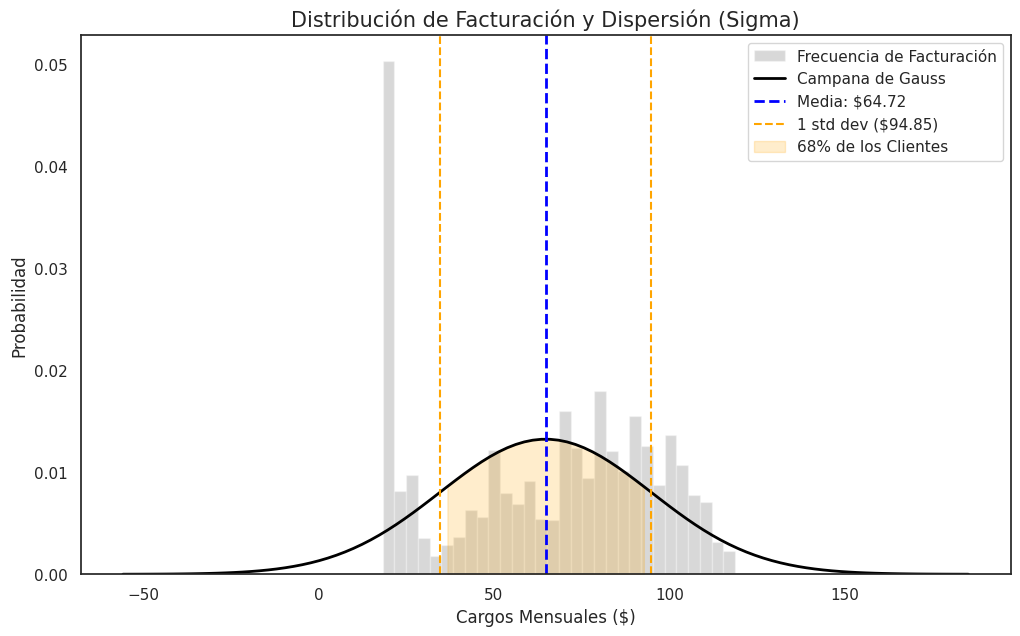

La desviación estándar es de $30.13. Esto significa que el grueso de tus clientes varía en ese rango respecto al promedio.


In [239]:
import scipy.stats as stats

# 1. Datos base
data = df['Cargos_Mensuales']
mu = data.mean()
sigma = data.std()

# 2. Crear el gráfico
plt.figure(figsize=(12, 7))
n, bins, patches = plt.hist(data, bins=30, density=True, alpha=0.3, color='gray', label='Frecuencia de Facturación')

# 3. Dibujar la Campana de Gauss (Distribución Normal Teórica)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='black', lw=2, label='Campana de Gauss')

# 4. Sombrear las Desviaciones Estándar
plt.axvline(mu, color='blue', linestyle='dashed', lw=2, label=f'Media: ${mu:.2f}')
plt.axvline(mu + sigma, color='orange', linestyle='--', label=f'1 std dev (${mu+sigma:.2f})')
plt.axvline(mu - sigma, color='orange', linestyle='--')

plt.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x >= mu-sigma) & (x <= mu+sigma),
                 color='orange', alpha=0.2, label='68% de los Clientes')

plt.title('Distribución de Facturación y Dispersión (Sigma)', fontsize=15)
plt.xlabel('Cargos Mensuales ($)')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

print(f"La desviación estándar es de ${sigma:.2f}. Esto significa que el grueso de tus clientes varía en ese rango respecto al promedio.")

In [240]:
# Guardar el DataFrame tratado en un archivo CSV
df.to_csv('clientes_churn_tratado.csv', index=False, encoding='utf-8')

print("¡Archivo guardado exitosamente!")

¡Archivo guardado exitosamente!


In [241]:
archivotratado=pd.read_csv("/content/clientes_churn_tratado.csv")

In [242]:
archivotratado.head()

,ID_Cliente,Desercion,Genero,Genero_Codigo,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,...,Factura_Digital,Metodo_Pago,Metodo_Pago_Codigo,Cargos_Mensuales,Cargos_Totales,tiene_streaming,categoria_servicio,Perfil_Servicio,AnnualCharges,Estado_Cliente
0,0002-ORFBO,0,Female,0,0,1,1,9,1,0,...,1,Mailed check,1,65.6,593.30,1,Internet con Streaming,Solo Streaming Tv,787.2,Leales
1,0003-MKNFE,0,Male,1,0,0,0,9,1,1,...,0,Mailed check,1,59.9,542.40,1,Internet con Streaming,Solo Streaming Movie,718.8,Leales
2,0004-TLHLJ,1,Male,1,0,0,0,4,1,0,...,1,Electronic check,0,73.9,280.85,0,Internet sin Streaming,Solo Internet,886.8,Fuga
3,0011-IGKFF,1,Male,1,1,1,0,13,1,0,...,1,Electronic check,0,98.0,1237.85,1,Internet con Streaming,Ambos streaming,1176.0,Fuga
4,0013-EXCHZ,1,Female,0,1,1,0,3,1,0,...,1,Mailed check,1,83.9,267.40,1,Internet con Streaming,Solo Streaming Tv,1006.8,Fuga


In [243]:
archivotratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Desercion               7267 non-null   int64  
 2   Genero                  7267 non-null   object 
 3   Genero_Codigo           7267 non-null   int64  
 4   Adulto_Mayor            7267 non-null   int64  
 5   Tiene_Pareja            7267 non-null   int64  
 6   Dependientes            7267 non-null   int64  
 7   Meses_Permanencia       7267 non-null   int64  
 8   Servicio_Telefonico     7267 non-null   int64  
 9   Lineas_Multiples        7267 non-null   int64  
 10  Tipo_Internet           7267 non-null   object 
 11  Tipo_Internet_Codigo    7267 non-null   int64  
 12  Seguridad_Online        7267 non-null   int64  
 13  Respaldo_Online         7267 non-null   int64  
 14  Proteccion_Dispositivo  7267 non-null   

In [244]:
# Eliminacion de Columnas Innecesarias
columnas_a_eliminar = ['Genero', 'Estado_Cliente', 'AnnualCharges','Cargos_Totales','Cargos_Mensuales']

# Eliminamos las columnas del DataFrame original
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificamos que se hayan eliminado
print(df.columns)

Index(['ID_Cliente', 'Desercion', 'Genero_Codigo', 'Adulto_Mayor',
       'Tiene_Pareja', 'Dependientes', 'Meses_Permanencia',
       'Servicio_Telefonico', 'Lineas_Multiples', 'Tipo_Internet',
       'Tipo_Internet_Codigo', 'Seguridad_Online', 'Respaldo_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
       'Streaming_Peliculas', 'Tipo_Contrato', 'Tipo_Contrato_Codigo',
       'Factura_Digital', 'Metodo_Pago', 'Metodo_Pago_Codigo',
       'tiene_streaming', 'categoria_servicio', 'Perfil_Servicio'],
      dtype='object')


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID_Cliente              7267 non-null   object
 1   Desercion               7267 non-null   int64 
 2   Genero_Codigo           7267 non-null   int64 
 3   Adulto_Mayor            7267 non-null   int64 
 4   Tiene_Pareja            7267 non-null   int64 
 5   Dependientes            7267 non-null   int64 
 6   Meses_Permanencia       7267 non-null   int64 
 7   Servicio_Telefonico     7267 non-null   int64 
 8   Lineas_Multiples        7267 non-null   int64 
 9   Tipo_Internet           7267 non-null   object
 10  Tipo_Internet_Codigo    7267 non-null   int64 
 11  Seguridad_Online        7267 non-null   int64 
 12  Respaldo_Online         7267 non-null   int64 
 13  Proteccion_Dispositivo  7267 non-null   int64 
 14  Soporte_Tecnico         7267 non-null   int64 
 15  Stre

In [246]:
# Eliminacion de Columnas Innecesarias
columnas_a_eliminar = ['categoria_servicio', 'Metodo_Pago', 'ID_Cliente']

# Eliminamos las columnas del DataFrame original
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificamos que se hayan eliminado
print(df.columns)

Index(['Desercion', 'Genero_Codigo', 'Adulto_Mayor', 'Tiene_Pareja',
       'Dependientes', 'Meses_Permanencia', 'Servicio_Telefonico',
       'Lineas_Multiples', 'Tipo_Internet', 'Tipo_Internet_Codigo',
       'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
       'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
       'Tipo_Contrato', 'Tipo_Contrato_Codigo', 'Factura_Digital',
       'Metodo_Pago_Codigo', 'tiene_streaming', 'Perfil_Servicio'],
      dtype='object')


In [247]:
df.head()

,Desercion,Genero_Codigo,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Tipo_Internet,Tipo_Internet_Codigo,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Tipo_Contrato_Codigo,Factura_Digital,Metodo_Pago_Codigo,tiene_streaming,Perfil_Servicio
0,0,0,0,1,1,9,1,0,DSL,1,...,0,1,1,0,One year,1,1,1,1,Solo Streaming Tv
1,0,1,0,0,0,9,1,1,DSL,1,...,0,0,0,1,Month-to-month,0,0,1,1,Solo Streaming Movie
2,1,1,0,0,0,4,1,0,Fiber optic,2,...,1,0,0,0,Month-to-month,0,1,0,0,Solo Internet
3,1,1,1,1,0,13,1,0,Fiber optic,2,...,1,0,1,1,Month-to-month,0,1,0,1,Ambos streaming
4,1,0,1,1,0,3,1,0,Fiber optic,2,...,0,1,1,0,Month-to-month,0,1,1,1,Solo Streaming Tv


In [248]:
# Correccion de error en la eliminacion de columnas del df
# Creas una copia independiente para trabajar
df = archivotratado.copy()

In [249]:
# Eliminacion de Columnas Innecesarias
columnas_a_eliminar = ['ID_Cliente', 'Genero', 'Estado_Cliente','AnnualCharges','Cargos_Totales','Cargos_Mensuales']

# Eliminamos las columnas del DataFrame original
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificamos que se hayan eliminado
print(df.columns)

Index(['Desercion', 'Genero_Codigo', 'Adulto_Mayor', 'Tiene_Pareja',
       'Dependientes', 'Meses_Permanencia', 'Servicio_Telefonico',
       'Lineas_Multiples', 'Tipo_Internet', 'Tipo_Internet_Codigo',
       'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
       'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
       'Tipo_Contrato', 'Tipo_Contrato_Codigo', 'Factura_Digital',
       'Metodo_Pago', 'Metodo_Pago_Codigo', 'tiene_streaming',
       'categoria_servicio', 'Perfil_Servicio'],
      dtype='object')


In [250]:
df.head()

,Desercion,Genero_Codigo,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Tipo_Internet,Tipo_Internet_Codigo,...,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Tipo_Contrato_Codigo,Factura_Digital,Metodo_Pago,Metodo_Pago_Codigo,tiene_streaming,categoria_servicio,Perfil_Servicio
0,0,0,0,1,1,9,1,0,DSL,1,...,1,0,One year,1,1,Mailed check,1,1,Internet con Streaming,Solo Streaming Tv
1,0,1,0,0,0,9,1,1,DSL,1,...,0,1,Month-to-month,0,0,Mailed check,1,1,Internet con Streaming,Solo Streaming Movie
2,1,1,0,0,0,4,1,0,Fiber optic,2,...,0,0,Month-to-month,0,1,Electronic check,0,0,Internet sin Streaming,Solo Internet
3,1,1,1,1,0,13,1,0,Fiber optic,2,...,1,1,Month-to-month,0,1,Electronic check,0,1,Internet con Streaming,Ambos streaming
4,1,0,1,1,0,3,1,0,Fiber optic,2,...,1,0,Month-to-month,0,1,Mailed check,1,1,Internet con Streaming,Solo Streaming Tv


In [251]:
# Crear las columnas para Perfil_Servicio
df = pd.get_dummies(df, columns=['Perfil_Servicio'], prefix='Perfil', drop_first=False)

# Convertir a 1 y 0
columnas_perfil = [col for col in df.columns if 'Perfil_' in col]
df[columnas_perfil] = df[columnas_perfil].astype(int)

# Verificamos cómo quedaron
print("Nuevas columnas de Perfil:")
print(df[columnas_perfil].head())

Nuevas columnas de Perfil:
   Perfil_Ambos streaming  Perfil_Sin Internet  Perfil_Solo Internet  \
0                       0                    0                     0   
1                       0                    0                     0   
2                       0                    0                     1   
3                       1                    0                     0   
4                       0                    0                     0   

   Perfil_Solo Streaming Movie  Perfil_Solo Streaming Tv  
0                            0                         1  
1                            1                         0  
2                            0                         0  
3                            0                         0  
4                            0                         1  


In [252]:
# Crear las 3 columnas para Tipo_Contrato (Mes a mes, Un año, Dos años)
df = pd.get_dummies(df, columns=['Tipo_Contrato'], prefix='Contrato', drop_first=False)

# Identificar las nuevas columnas creadas para convertirlas a 1 y 0
columnas_contrato = [col for col in df.columns if 'Contrato_' in col]
df[columnas_contrato] = df[columnas_contrato].astype(int)

# Verificamos la transformación
print("Nuevas columnas de contrato:")
print(df[columnas_contrato].head())

Nuevas columnas de contrato:
   Tipo_Contrato_Codigo  Contrato_Month-to-month  Contrato_One year  \
0                     1                        0                  1   
1                     0                        1                  0   
2                     0                        1                  0   
3                     0                        1                  0   
4                     0                        1                  0   

   Contrato_Two year  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [253]:
# Crear las 3 columnas para Tipo_Internet
# Usamos drop_first=False para asegurarnos de que cree una columna por cada categoría
df = pd.get_dummies(df, columns=['Tipo_Internet'], prefix='Internet', drop_first=False)

# Convertir los valores True/False a 1/0 (opcional, pero recomendado para análisis matemático)
columnas_internet = [col for col in df.columns if 'Internet_' in col]
df[columnas_internet] = df[columnas_internet].astype(int)

# Verificamos el resultado
print("Nuevas columnas creadas:")
print(df[columnas_internet].head())

Nuevas columnas creadas:
   Tipo_Internet_Codigo  Internet_0  Internet_DSL  Internet_Fiber optic
0                     1           0             1                     0
1                     1           0             1                     0
2                     2           0             0                     1
3                     2           0             0                     1
4                     2           0             0                     1


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Desercion                    7267 non-null   int64 
 1   Genero_Codigo                7267 non-null   int64 
 2   Adulto_Mayor                 7267 non-null   int64 
 3   Tiene_Pareja                 7267 non-null   int64 
 4   Dependientes                 7267 non-null   int64 
 5   Meses_Permanencia            7267 non-null   int64 
 6   Servicio_Telefonico          7267 non-null   int64 
 7   Lineas_Multiples             7267 non-null   int64 
 8   Tipo_Internet_Codigo         7267 non-null   int64 
 9   Seguridad_Online             7267 non-null   int64 
 10  Respaldo_Online              7267 non-null   int64 
 11  Proteccion_Dispositivo       7267 non-null   int64 
 12  Soporte_Tecnico              7267 non-null   int64 
 13  Streaming_TV                 7267

In [256]:
# Eliminacion de Columnas Innecesarias
columnas_a_eliminar = ['Tipo_Contrato_Codigo','Tipo_Internet_Codigo','categoria_servicio','tiene_streaming']

# Eliminamos las columnas del DataFrame original
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificamos que se hayan eliminado
print(df.columns)

Index(['Desercion', 'Genero_Codigo', 'Adulto_Mayor', 'Tiene_Pareja',
       'Dependientes', 'Meses_Permanencia', 'Servicio_Telefonico',
       'Lineas_Multiples', 'Seguridad_Online', 'Respaldo_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
       'Streaming_Peliculas', 'Factura_Digital', 'Metodo_Pago',
       'Metodo_Pago_Codigo', 'Perfil_Ambos streaming', 'Perfil_Sin Internet',
       'Perfil_Solo Internet', 'Perfil_Solo Streaming Movie',
       'Perfil_Solo Streaming Tv', 'Contrato_Month-to-month',
       'Contrato_One year', 'Contrato_Two year', 'Internet_0', 'Internet_DSL',
       'Internet_Fiber optic'],
      dtype='object')


In [257]:
df.head()

,Desercion,Genero_Codigo,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Seguridad_Online,Respaldo_Online,...,Perfil_Sin Internet,Perfil_Solo Internet,Perfil_Solo Streaming Movie,Perfil_Solo Streaming Tv,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Internet_0,Internet_DSL,Internet_Fiber optic
0,0,0,0,1,1,9,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,0,1,0,0,0,9,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1,1,0,0,0,4,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,1,1,1,1,0,13,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1,0,1,1,0,3,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Desercion                    7267 non-null   int64 
 1   Genero_Codigo                7267 non-null   int64 
 2   Adulto_Mayor                 7267 non-null   int64 
 3   Tiene_Pareja                 7267 non-null   int64 
 4   Dependientes                 7267 non-null   int64 
 5   Meses_Permanencia            7267 non-null   int64 
 6   Servicio_Telefonico          7267 non-null   int64 
 7   Lineas_Multiples             7267 non-null   int64 
 8   Seguridad_Online             7267 non-null   int64 
 9   Respaldo_Online              7267 non-null   int64 
 10  Proteccion_Dispositivo       7267 non-null   int64 
 11  Soporte_Tecnico              7267 non-null   int64 
 12  Streaming_TV                 7267 non-null   int64 
 13  Streaming_Peliculas          7267

In [259]:
# Crear las 3 columnas para Tipo_Internet
# Usamos drop_first=False para asegurarnos de que cree una columna por cada categoría
df = pd.get_dummies(df, columns=['Metodo_Pago'], prefix='Internet', drop_first=False)

# Convertir los valores True/False a 1/0 (opcional, pero recomendado para análisis matemático)
columnas_internet = [col for col in df.columns if 'Internet_' in col]
df[columnas_internet] = df[columnas_internet].astype(int)

# Verificamos el resultado
print("Nuevas columnas creadas:")
print(df[columnas_internet].head())

Nuevas columnas creadas:
   Internet_0  Internet_DSL  Internet_Fiber optic  \
0           0             1                     0   
1           0             1                     0   
2           0             0                     1   
3           0             0                     1   
4           0             0                     1   

   Internet_Bank transfer (automatic)  Internet_Credit card (automatic)  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Internet_Electronic check  Internet_Mailed check  
0                          0                      1  
1                          0                      1  
2                          1               

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Desercion                           7267 non-null   int64
 1   Genero_Codigo                       7267 non-null   int64
 2   Adulto_Mayor                        7267 non-null   int64
 3   Tiene_Pareja                        7267 non-null   int64
 4   Dependientes                        7267 non-null   int64
 5   Meses_Permanencia                   7267 non-null   int64
 6   Servicio_Telefonico                 7267 non-null   int64
 7   Lineas_Multiples                    7267 non-null   int64
 8   Seguridad_Online                    7267 non-null   int64
 9   Respaldo_Online                     7267 non-null   int64
 10  Proteccion_Dispositivo              7267 non-null   int64
 11  Soporte_Tecnico                     7267 non-null   int64
 12  Stream

In [261]:
# Eliminacion de Columnas Innecesarias
columnas_a_eliminar = ['Metodo_Pago_Codigo']

# Eliminamos las columnas del DataFrame original
df.drop(columns=columnas_a_eliminar, inplace=True)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Desercion                           7267 non-null   int64
 1   Genero_Codigo                       7267 non-null   int64
 2   Adulto_Mayor                        7267 non-null   int64
 3   Tiene_Pareja                        7267 non-null   int64
 4   Dependientes                        7267 non-null   int64
 5   Meses_Permanencia                   7267 non-null   int64
 6   Servicio_Telefonico                 7267 non-null   int64
 7   Lineas_Multiples                    7267 non-null   int64
 8   Seguridad_Online                    7267 non-null   int64
 9   Respaldo_Online                     7267 non-null   int64
 10  Proteccion_Dispositivo              7267 non-null   int64
 11  Soporte_Tecnico                     7267 non-null   int64
 12  Stream

In [264]:
# Carga de Backup para agregar columna de cargo mensual y anual
df_backup = pd.read_csv('/content/clientes_churn_tratado.csv')

# Recuperamos las columnas que habías borrado
# (Asegúrate de que los nombres coincidan: 'MonthlyCharges' y 'TotalCharges')
df['Cargos_Mensuales'] = df_backup['Cargos_Mensuales']
df['Cargos_Totales'] = df_backup['Cargos_Totales']

In [265]:
df_backup.head()

,ID_Cliente,Desercion,Genero,Genero_Codigo,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,...,Factura_Digital,Metodo_Pago,Metodo_Pago_Codigo,Cargos_Mensuales,Cargos_Totales,tiene_streaming,categoria_servicio,Perfil_Servicio,AnnualCharges,Estado_Cliente
0,0002-ORFBO,0,Female,0,0,1,1,9,1,0,...,1,Mailed check,1,65.6,593.30,1,Internet con Streaming,Solo Streaming Tv,787.2,Leales
1,0003-MKNFE,0,Male,1,0,0,0,9,1,1,...,0,Mailed check,1,59.9,542.40,1,Internet con Streaming,Solo Streaming Movie,718.8,Leales
2,0004-TLHLJ,1,Male,1,0,0,0,4,1,0,...,1,Electronic check,0,73.9,280.85,0,Internet sin Streaming,Solo Internet,886.8,Fuga
3,0011-IGKFF,1,Male,1,1,1,0,13,1,0,...,1,Electronic check,0,98.0,1237.85,1,Internet con Streaming,Ambos streaming,1176.0,Fuga
4,0013-EXCHZ,1,Female,0,1,1,0,3,1,0,...,1,Mailed check,1,83.9,267.40,1,Internet con Streaming,Solo Streaming Tv,1006.8,Fuga


In [266]:
df.head()

,Desercion,Genero_Codigo,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Seguridad_Online,Respaldo_Online,...,Contrato_Two year,Internet_0,Internet_DSL,Internet_Fiber optic,Internet_Bank transfer (automatic),Internet_Credit card (automatic),Internet_Electronic check,Internet_Mailed check,Cargos_Mensuales,Cargos_Totales
0,0,0,0,1,1,9,1,0,0,1,...,0,0,1,0,0,0,0,1,65.6,593.30
1,0,1,0,0,0,9,1,1,0,0,...,0,0,1,0,0,0,0,1,59.9,542.40
2,1,1,0,0,0,4,1,0,0,0,...,0,0,0,1,0,0,1,0,73.9,280.85
3,1,1,1,1,0,13,1,0,0,1,...,0,0,0,1,0,0,1,0,98.0,1237.85
4,1,0,1,1,0,3,1,0,0,0,...,0,0,0,1,0,0,0,1,83.9,267.40


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Desercion                           7267 non-null   int64  
 1   Genero_Codigo                       7267 non-null   int64  
 2   Adulto_Mayor                        7267 non-null   int64  
 3   Tiene_Pareja                        7267 non-null   int64  
 4   Dependientes                        7267 non-null   int64  
 5   Meses_Permanencia                   7267 non-null   int64  
 6   Servicio_Telefonico                 7267 non-null   int64  
 7   Lineas_Multiples                    7267 non-null   int64  
 8   Seguridad_Online                    7267 non-null   int64  
 9   Respaldo_Online                     7267 non-null   int64  
 10  Proteccion_Dispositivo              7267 non-null   int64  
 11  Soporte_Tecnico                     7267 no